### Table of contents <a id='menu'>

* [0. Data Collected](#dc)
* [1. Data Validation & Cleaning](#dvc)
     
    @ Insights
* [2. EDA](#eda)
    
    @Predictive Modelling
* [3. x,y](#xy)
* [4. Feature Selection of X](#fsox)
* [5. Train-Test split](#tts)
* [6. Na & Out of Train & Test](#nott)
* [7. Pre-Processing of xtrain & xtest](#ppxt)
* [8. Modelling](#model)
* [9. Model Performance](#mp)
* [10. RealTimePredictions](#rtp)

**Python Libraries Required**

In [2]:
# Data Mining
import pandas as pd
import numpy as np

# Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Warnings
import warnings
warnings.filterwarnings("ignore")

### 0. Data Collected <a id='dc'>
    
[Back to Top](#menu)

* The collected Fuel_Consumption dataset we will check each and every column data properly

In [3]:
# Loading Dataset

rawdata = pd.read_csv("Fuel_consumption.csv")

In [4]:
rawdata.columns

Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

**Fuel_Consumption_Dataset Features Info**:

Column|Description
-----------|--------
Model Year|Model release year
Make|The Brand of the vehicle
Model|Model refers to the specific vehicle model
Vehicle Class|The capacity of vehicle
Engine Size|Total displacement of all cylinders (in litres [L]); electric motor peak power output (in kilowatts [kW]); number of engine
cylinders
Cylinders|Number of Cylinders
Transmission|A = Automatic; AM = Automated manual; AS = Automatic with select shift; AV = Continuously variable; M = Manual; Number of gears/speeds(1–10)
Fuel Type|X = Regular gasoline; Z = Premium gasoline; D = Diesel; E = E85; B = Electricity; N = Natural gas
Fuel Consumption (City (L/100 km)|City fuel consumption ratings are shown in liters per 100 kilometers (L/100 km) - 
Fuel Consumption(Hwy (L/100 km))|highway fuel consumption ratings are shown in liters per 100 kilometers (L/100 km) - 
Fuel Consumption(Comb (L/100 km))|Combined fuel consumption ratings are shown in liters per 100 kilometers (L/100 km) - 
Fuel Consumption(Comb (mpg))|The combined rating is shown in L/100 km and in miles per imperial gallon (mpg)
CO2 Emissions(g/km)|The tailpipe emissions of carbon dioxide (in grams per kilometer) for combined city and highway driving
CO2 Rating|The tailpipe emissions of carbon dioxide rated on a scale from 1 (worst) to 10 (best)
Smog Rating|The tailpipe emissions of smog-forming pollutants rated on a scale from 1 (worst) to 10 (best)

**Basic Checks of Fuel_Consumption Dataset**

In [5]:
rawdata.shape

(946, 15)

In [6]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

* Some of the columns are having missing values
* Some of the numeric columns are in object format , need to convert them

In [7]:
print("First five rows of Data: ")
display(rawdata.head())

print()

print("Last Five rows of Data: ")
display(rawdata.tail())

First five rows of Data: 


,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7



Last Five rows of Data: 


,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5,5
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5,7
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5
945,2022,Volvo,XC90 T6 AWD,SUV: Standard,2.0,4,AS8,Z,12.4,8.9,10.8,26,252,5,7


**Handling Duplicates**
* Convert categorical columns into lower case for the duplicates check

Note:
* You need to check duplicates before data validation and after data validation

In [8]:
# converting categorical columns to lower
for i in rawdata.columns:
    if rawdata[i].dtype == object:
        rawdata[i] = rawdata[i].str.lower()

In [9]:
# check duplicates
rawdata[rawdata.duplicated()] 

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating


In [10]:
rawdata = rawdata.drop_duplicates().reset_index(drop=True)

**Deleting the Model Year Column**

In [11]:
del rawdata['Model Year']

In [12]:
rawdata.head(2)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,acura,ilx,compact,2.4,4,am8,z,9.9,7.0,8.6,33,200,6,3
1,acura,mdx sh-awd,suv: small,3.5,6,as10,z,12.6,9.4,11.2,25,263,4,5


In [13]:
rawdata.shape

(946, 14)

**Checking Missing values**

In [14]:
rawdata.isnull().sum()

Make                                 0
Model                                0
Vehicle Class                        0
Engine Size(L)                       0
Cylinders                            0
Transmission                         0
Fuel Type                            0
Fuel Consumption (City (L/100 km)    0
Fuel Consumption(Hwy (L/100 km))     0
Fuel Consumption(Comb (L/100 km))    0
Fuel Consumption(Comb (mpg))         0
CO2 Emissions(g/km)                  0
CO2 Rating                           0
Smog Rating                          0
dtype: int64

### 1. Data Validation & Cleaning <a id='dvc'>
[Back to top](#menu)

**Checking each and every column data**
* We are using string methods for this entire analysis
* Here i am Modifying the all columns data

In [15]:
rawdata.rename(columns={'Engine Size(L)':"Engine_Size_L",
                        'Fuel Type':"Fuel_Type", 
                        'Vehicle Class':'Vehicle_Class',
                        'Fuel Consumption (City (L/100 km)':"Fuel_Consumption_City_L_100_km",
                        'Fuel Consumption(Hwy (L/100 km))':"Fuel_Consumption_Hwy_L_100_km",
                        'Fuel Consumption(Comb (L/100 km))':"Fuel_Consumption_Comb_L_100_km",
                        'Fuel Consumption(Comb (mpg))':"Fuel_Consumption_Comb_mpg",
                        'CO2 Emissions(g/km)':"CO2_Emissions_g_km",
                        'CO2 Rating':"CO2_Rating",
                        'Smog Rating':"Smog_Rating"},inplace=True)

In [16]:
rawdata.head()

,Make,Model,Vehicle_Class,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L_100_km,Fuel_Consumption_Hwy_L_100_km,Fuel_Consumption_Comb_L_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km,CO2_Rating,Smog_Rating
0,acura,ilx,compact,2.4,4,am8,z,9.9,7.0,8.6,33,200,6,3
1,acura,mdx sh-awd,suv: small,3.5,6,as10,z,12.6,9.4,11.2,25,263,4,5
2,acura,rdx sh-awd,suv: small,2.0,4,as10,z,11.0,8.6,9.9,29,232,5,6
3,acura,rdx sh-awd a-spec,suv: small,2.0,4,as10,z,11.3,9.1,10.3,27,242,5,6
4,acura,tlx sh-awd,compact,2.0,4,as10,z,11.2,8.0,9.8,29,230,5,7


* Data is valid, belongs to make
* replacing Special characters  
    - we will be using replace method in pandas

            str.replace -  will be used to replace any character in string
            replace -  will be used to replace entire string

**Make**

In [17]:
rawdata.Make = rawdata.Make.str.replace("-","_").str.replace(" ","_")

In [18]:
rawdata.Make.unique(),rawdata.Make.nunique(),rawdata.Make.dtype

(array(['acura', 'alfa_romeo', 'aston_martin', 'audi', 'bentley', 'bmw',
        'bugatti', 'buick', 'cadillac', 'chevrolet', 'chrysler', 'dodge',
        'fiat', 'ford', 'genesis', 'gmc', 'honda', 'hyundai', 'infiniti',
        'jaguar', 'jeep', 'kia', 'lamborghini', 'land_rover', 'lexus',
        'lincoln', 'maserati', 'mazda', 'mercedes_benz', 'mini',
        'mitsubishi', 'nissan', 'porsche', 'ram', 'rolls_royce', 'subaru',
        'toyota', 'volkswagen', 'volvo'], dtype=object),
 39,
 dtype('O'))

* Data is valid
* Replace the Special charcters in the Make column.

**Model**

In [19]:
rawdata.Model = rawdata.Model.str.replace(" ", "_").str.replace("-","_").str.strip("()").str.replace("+", "_").str.replace("/","_")

In [20]:
rawdata.Model.unique(),rawdata.Model.nunique(),rawdata.Model.dtype

(array(['ilx', 'mdx_sh_awd', 'rdx_sh_awd', 'rdx_sh_awd_a_spec',
        'tlx_sh_awd', 'tlx_sh_awd_a_spec', 'tlx_type_s',
        'tlx_type_s_(performance_tire', 'giulia', 'giulia_awd',
        'giulia_quadrifoglio', 'stelvio', 'stelvio_awd',
        'stelvio_awd_quadrifoglio', 'db11_v8', 'db11_v12', 'dbs_v12',
        'dbx_v8', 'vantage_v8', 'a3_sedan_40_tfsi_quattro',
        'a4_sedan_40_tfsi_quattro', 'a4_sedan_45_tfsi_quattro',
        'a4_allroad_45_tfsi_quattro', 'a5_cabriolet_45_tfsi_quattro',
        'a5_coupe_45_tfsi_quattro', 'a5_sportback_45_tfsi_quattro',
        'a6_sedan_45_tfsi_quattro', 'a6_sedan_55_tfsi_quattro',
        'a6_allroad_55_tfsi_quattro', 'a7_sportback_55_tfsi_quattro',
        'a8_l_sedan_55_tfsi_quattro', 'q3_40_tfsi_quattro',
        'q3_45_tfsi_quattro', 'q5_40_tfsi_quattro', 'q5_45_tfsi_quattro',
        'q5_sportback_45_tfsi_quattro', 'q7_45_tfsi_quattro',
        'q7_55_tfsi_quattro', 'q8_55_tfsi_quattro', 'r8_coupe_performance',
        'r8_coupe_pe

In [21]:
rawdata.Model.unique()

array(['ilx', 'mdx_sh_awd', 'rdx_sh_awd', 'rdx_sh_awd_a_spec',
       'tlx_sh_awd', 'tlx_sh_awd_a_spec', 'tlx_type_s',
       'tlx_type_s_(performance_tire', 'giulia', 'giulia_awd',
       'giulia_quadrifoglio', 'stelvio', 'stelvio_awd',
       'stelvio_awd_quadrifoglio', 'db11_v8', 'db11_v12', 'dbs_v12',
       'dbx_v8', 'vantage_v8', 'a3_sedan_40_tfsi_quattro',
       'a4_sedan_40_tfsi_quattro', 'a4_sedan_45_tfsi_quattro',
       'a4_allroad_45_tfsi_quattro', 'a5_cabriolet_45_tfsi_quattro',
       'a5_coupe_45_tfsi_quattro', 'a5_sportback_45_tfsi_quattro',
       'a6_sedan_45_tfsi_quattro', 'a6_sedan_55_tfsi_quattro',
       'a6_allroad_55_tfsi_quattro', 'a7_sportback_55_tfsi_quattro',
       'a8_l_sedan_55_tfsi_quattro', 'q3_40_tfsi_quattro',
       'q3_45_tfsi_quattro', 'q5_40_tfsi_quattro', 'q5_45_tfsi_quattro',
       'q5_sportback_45_tfsi_quattro', 'q7_45_tfsi_quattro',
       'q7_55_tfsi_quattro', 'q8_55_tfsi_quattro', 'r8_coupe_performance',
       'r8_coupe_performance_quattr

* Data is valid
* Replace the Special charcters in the Model column

**Vehicle_Class**

In [22]:
rawdata.Vehicle_Class = rawdata.Vehicle_Class.str.replace(":","_").str.replace("-","_")

In [23]:
rawdata.Vehicle_Class.unique(),rawdata.Vehicle_Class.nunique(),rawdata.Vehicle_Class.dtype

(array(['compact', 'suv_ small', 'mid_size', 'minicompact',
        'suv_ standard', 'two_seater', 'subcompact',
        'station wagon_ small', 'station wagon_ mid_size', 'full_size',
        'pickup truck_ small', 'pickup truck_ standard', 'minivan',
        'special purpose vehicle'], dtype=object),
 14,
 dtype('O'))

* Data is valid
* Replace the Special charcters and also replace the column data properly in the Vehicle_Class.

**Transmission**

In [24]:
rawdata.Transmission.replace({"am8":"Automated manual8","as10":"Automatic with select shift10",
                              "a8":"Automatic8","a9":"Automated9","am7":"Automated manual7",
                              "as8":"Automatic with select shift8","m6":"Manual6",
                              "as6":"Automatic with select shift6","av":"Continuously variable",
                              "as9":"Automatic with select shift9","a10":"Automated10",
                              "a6":"Automated6","m5":"Manual5",
                              "m7":"Manual7","av7":"Continuously variable7",
                              "av1":"Continuously variable1","am6":"Automated manual6",
                              "as7":"Automaticwith select shift7","av8":"Continuously variable8",
                              "av6":"Continuously variable6","av10":"Continuously variable10",
                              "as5":"Automatic with select shift5","a7":"Automated7"},inplace = True)

In [25]:
rawdata.Transmission = rawdata.Transmission.str.replace(" ","_")

In [26]:
rawdata.Transmission.unique(),rawdata.Transmission.nunique(),rawdata.Transmission.dtype

(array(['Automated_manual8', 'Automatic_with_select_shift10', 'Automatic8',
        'Automated9', 'Automated_manual7', 'Automatic_with_select_shift8',
        'Manual6', 'Automatic_with_select_shift6', 'Continuously_variable',
        'Automatic_with_select_shift9', 'Automated10', 'Automated6',
        'Manual5', 'Manual7', 'Continuously_variable7',
        'Continuously_variable1', 'Automated_manual6',
        'Automaticwith_select_shift7', 'Continuously_variable8',
        'Continuously_variable6', 'Continuously_variable10',
        'Automatic_with_select_shift5', 'Automated7'], dtype=object),
 23,
 dtype('O'))

* Data is valid
* Replace the Special charcters and also replace the column data properly in the Transmission.

**Fuel_Type**

In [27]:
rawdata.Fuel_Type = rawdata.Fuel_Type.str.replace(" ","_")

In [28]:
rawdata.Fuel_Type.unique(),rawdata.Fuel_Type.nunique(),rawdata.Fuel_Type.dtype

(array(['z', 'x', 'd', 'e'], dtype=object), 4, dtype('O'))

In [29]:
rawdata.Fuel_Type.replace({"z":"Premium_gasoline",
                              "x":"Regular_gasoline",
                              "d":"Diesel",
                              "e":"E85"},inplace = True)

In [30]:
rawdata.Fuel_Type.unique()

array(['Premium_gasoline', 'Regular_gasoline', 'Diesel', 'E85'],
      dtype=object)

* Data is valid
* Replace the Special charcters and also replace the column data properly.

**Cylinders**

In [31]:
rawdata.Cylinders.unique(),rawdata.Cylinders.nunique(),rawdata.Cylinders.dtype

(array([ 4,  6,  8, 12, 10,  5, 16,  3], dtype=int64), 8, dtype('int64'))

**Fuel_Consumption_City_L_100_km**

In [32]:
rawdata.Fuel_Consumption_City_L_100_km.unique(),rawdata.Fuel_Consumption_City_L_100_km.nunique(),rawdata.Fuel_Consumption_City_L_100_km.dtype

(array([ 9.9, 12.6, 11. , 11.3, 11.2, 12.3, 10. , 10.5, 13.5, 10.3, 10.8,
        13.9, 13. , 16.4, 16.8, 13.1,  8.5,  9.1,  9.8, 10.4, 10.2, 11.1,
        11.5, 11.4, 12. , 12.8, 16.7, 17.9, 16.1, 16. , 18. , 16.9, 12.5,
        11.7, 15.8, 19. , 14.9, 19.6, 15.2, 20.3, 15.5, 19.2,  9.5, 10.1,
        15.7, 14.7, 14.5, 14.6, 15.1, 10.9, 17.8, 14.4, 12.1,  9.4, 26.8,
        30.3, 13.6,  9.7,  8. ,  8.2,  9. , 11.9, 15. , 12.4, 18.1, 18.3,
        16.3, 17. , 12.9, 10.6, 17.2, 12.2, 11.8, 14. , 13.3,  8.9, 10.7,
        16.2, 21.5, 16.5, 22. , 17.4, 23.1, 15.6, 15.3, 16.6, 18.2,  7.7,
        15.9, 14.1, 17.6, 18.6, 12.7, 13.8,  9.3, 11.6,  5.4,  5.5, 14.8,
        15.4, 13.4, 13.7, 20.8, 20.1, 17.3, 21.2, 20.7, 14.3, 19.9,  5.6,
        17.1,  9.2,  9.6,  7.8,  8.1,  5. ,  5.3,  7.6,  8.7,  8.3,  8.4,
         8.8,  7.1,  4.5,  4.3,  4. ,  6.3,  7.9,  8.6, 17.5, 18.5,  4.4,
         7.2,  6.4, 26.5, 13.2, 14.2,  5.7,  7.5,  6.6,  7.4, 22.4, 20. ,
         4.9,  6.7,  4.6,  5.8,  6.8, 

**Fuel_Consumption_Hwy_L_100_km**

In [33]:
rawdata.Fuel_Consumption_Hwy_L_100_km.unique(),rawdata.Fuel_Consumption_Hwy_L_100_km.nunique(),rawdata.Fuel_Consumption_Hwy_L_100_km.dtype

(array([ 7. ,  9.4,  8.6,  9.1,  8. ,  8.1,  9.8,  7.2,  7.7,  9.3,  8.3,
        10.3, 10.7, 11.9,  9.6,  6.6,  7.6,  7.9,  7.5,  7.4,  7.8,  8.4,
        10.5, 12.1, 12.3,  8.5, 10.2,  9.7, 11.4,  9.9, 13. ,  9. , 12. ,
         9.2, 12.9, 11.6, 12.2,  6.9,  7.1, 11.5, 10.1, 10.4, 11. , 11.7,
        10.6, 16.6, 20.9,  7.3,  8.2,  8.7, 12.7,  9.5,  8.8,  8.9, 11.2,
        16. , 11.3, 13.1, 12.8, 16.4, 14.7, 19.6, 13.3, 11.8, 12.4, 14. ,
        13.9, 13.8, 13.2, 14.2, 14.1,  6.2, 10.9, 13.5,  6.8,  6.3,  6.4,
        10. , 10.8, 14.3, 14.4, 14.8,  6.5,  5. ,  5.7,  6.1,  6. ,  5.5,
         4.2,  4.1,  3.9,  4.6,  5.9,  4.9,  5.6, 14.6, 15.1, 12.6,  5.2,
         6.7, 11.1,  5.8, 16.5, 12.5,  4.8,  4.5,  4.7]),
 107,
 dtype('float64'))

**Fuel_Consumption_Comb_L_100_km**

In [34]:
rawdata.Fuel_Consumption_Comb_L_100_km.unique(),rawdata.Fuel_Consumption_Comb_L_100_km.nunique(),rawdata.Fuel_Consumption_Comb_L_100_km.dtype

(array([ 8.6, 11.2,  9.9, 10.3,  9.8, 11. ,  8.7,  9.2, 11.6,  9.3,  9.6,
        12.3, 11.5, 13.8, 14.6,  7.6,  8.2,  8.8,  8.9,  9.1, 10. , 10.6,
         9.4, 10.8, 11.7, 15.3, 11.4, 13.7, 13.5, 15.4,  9.7, 10.9, 13.9,
        10.1,  9. , 13.2, 16.3, 12.2, 16.2, 12.5, 17. , 16. ,  8.3, 12. ,
        12.6, 12.7, 12.9, 15.1, 10.4, 15.7, 11.1,  8.5, 22.2, 26.1, 11.8,
         7.8,  7.9,  9.5, 10.2, 13. , 10.7, 14.8, 15.2, 10.5, 14.7, 14.9,
        11.3, 12.1, 14.1,  8.4,  7.5, 14.5, 19.1, 13.4, 13.1, 14. , 19.5,
        21.5, 14.4, 15.5, 15. , 16.4,  7. ,  7.2, 14.3, 15.6, 12.4,  5.8,
         5.9, 12.8, 17.9, 17.4, 18.1, 17.8, 15.8, 13.3, 16.7,  6.3, 13.6,
         5. ,  5.5,  7.1,  8. ,  6.9,  7.7,  8.1,  6.7,  6.4,  4.4,  4.2,
         4. ,  7.4, 16.5,  4.6,  5.3,  6.6, 11.9, 21.2, 16.9,  6. ,  7.3,
         6.2,  6.5, 14.2, 19.8,  4.9,  5.1,  6.8,  4.5,  4.8,  6.1]),
 131,
 dtype('float64'))

**Fuel_Consumption_Comb_mpg**

In [35]:
rawdata.Fuel_Consumption_Comb_mpg.unique(),rawdata.Fuel_Consumption_Comb_mpg.nunique(),rawdata.Fuel_Consumption_Comb_mpg.dtype

(array([33, 25, 29, 27, 26, 32, 31, 24, 30, 23, 20, 19, 37, 34, 28, 18, 21,
        17, 22, 13, 11, 36, 38, 15, 14, 40, 39, 49, 48, 16, 45, 56, 51, 35,
        41, 42, 44, 64, 67, 71, 61, 53, 43, 47, 46, 58, 55, 63, 59],
       dtype=int64),
 49,
 dtype('int64'))

**CO2_Emissions_g_km**

In [36]:
rawdata.CO2_Emissions_g_km.unique(),rawdata.CO2_Emissions_g_km.nunique(),rawdata.CO2_Emissions_g_km.dtype

(array([200, 263, 232, 242, 230, 231, 256, 261, 205, 217, 271, 218, 226,
        288, 324, 343, 270, 178, 190, 208, 214, 224, 234, 248, 215, 233,
        220, 252, 273, 322, 356, 267, 268, 319, 315, 360, 206, 227, 254,
        323, 262, 325, 235, 209, 309, 383, 287, 379, 294, 395, 373, 195,
        202, 219, 279, 321, 212, 293, 292, 296, 301, 211, 354, 213, 207,
        241, 364, 302, 199, 223, 522, 608, 277, 201, 184, 185, 221, 216,
        239, 244, 297, 303, 222, 260, 258, 346, 281, 345, 353, 225, 237,
        269, 259, 251, 355, 349, 257, 283, 326, 329, 198, 175, 274, 240,
        341, 314, 304, 306, 328, 272, 265, 298, 347, 380, 358, 327, 359,
        339, 361, 381, 352, 385, 366, 165, 170, 332, 336, 197, 289, 249,
        307, 305, 368, 331, 363, 275, 291, 308, 310, 317, 238, 182, 136,
        139, 282, 300, 284, 295, 344, 357, 370, 313, 228, 147, 236, 246,
        392, 229, 245, 318, 338, 168, 176, 117, 129, 166, 167, 186, 162,
        180, 189, 181, 193, 179, 158, 151, 103,  99

**CO2_Rating**

In [37]:
rawdata.CO2_Rating.unique(),rawdata.CO2_Rating.nunique(),rawdata.CO2_Rating.dtype

(array([ 6,  4,  5,  3,  7,  2,  1,  8,  9, 10], dtype=int64),
 10,
 dtype('int64'))

**Smog_Rating**

In [38]:
rawdata.Smog_Rating.unique(),rawdata.Smog_Rating.nunique(),rawdata.Smog_Rating.dtype

(array([3, 5, 6, 7, 1], dtype=int64), 5, dtype('int64'))

In [39]:
rawdata.head(5)

,Make,Model,Vehicle_Class,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L_100_km,Fuel_Consumption_Hwy_L_100_km,Fuel_Consumption_Comb_L_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km,CO2_Rating,Smog_Rating
0,acura,ilx,compact,2.4,4,Automated_manual8,Premium_gasoline,9.9,7.0,8.6,33,200,6,3
1,acura,mdx_sh_awd,suv_ small,3.5,6,Automatic_with_select_shift10,Premium_gasoline,12.6,9.4,11.2,25,263,4,5
2,acura,rdx_sh_awd,suv_ small,2.0,4,Automatic_with_select_shift10,Premium_gasoline,11.0,8.6,9.9,29,232,5,6
3,acura,rdx_sh_awd_a_spec,suv_ small,2.0,4,Automatic_with_select_shift10,Premium_gasoline,11.3,9.1,10.3,27,242,5,6
4,acura,tlx_sh_awd,compact,2.0,4,Automatic_with_select_shift10,Premium_gasoline,11.2,8.0,9.8,29,230,5,7


### Data Understanding  
## 2. EDA (Exploratory Data Analysis): <a id='eda'>

[Back to Top](#menu)
* We can get insights on dataset using Exploratory Data Analysis (EDA) methods

* EDA can be of two things, 
    - Statistics
        - Descriptive
        - Inferential
    - Visual Analysis

In [40]:
rawdata.head()

,Make,Model,Vehicle_Class,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L_100_km,Fuel_Consumption_Hwy_L_100_km,Fuel_Consumption_Comb_L_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km,CO2_Rating,Smog_Rating
0,acura,ilx,compact,2.4,4,Automated_manual8,Premium_gasoline,9.9,7.0,8.6,33,200,6,3
1,acura,mdx_sh_awd,suv_ small,3.5,6,Automatic_with_select_shift10,Premium_gasoline,12.6,9.4,11.2,25,263,4,5
2,acura,rdx_sh_awd,suv_ small,2.0,4,Automatic_with_select_shift10,Premium_gasoline,11.0,8.6,9.9,29,232,5,6
3,acura,rdx_sh_awd_a_spec,suv_ small,2.0,4,Automatic_with_select_shift10,Premium_gasoline,11.3,9.1,10.3,27,242,5,6
4,acura,tlx_sh_awd,compact,2.0,4,Automatic_with_select_shift10,Premium_gasoline,11.2,8.0,9.8,29,230,5,7


**Understanding Column Data Types in stats point of view**

In [41]:
rawdata.dtypes

Make                               object
Model                              object
Vehicle_Class                      object
Engine_Size_L                     float64
Cylinders                           int64
Transmission                       object
Fuel_Type                          object
Fuel_Consumption_City_L_100_km    float64
Fuel_Consumption_Hwy_L_100_km     float64
Fuel_Consumption_Comb_L_100_km    float64
Fuel_Consumption_Comb_mpg           int64
CO2_Emissions_g_km                  int64
CO2_Rating                          int64
Smog_Rating                         int64
dtype: object

**Numerical and Categorical data**

Numerical(Quantitative) | Categorical(Qualitative)
--|---------------------
Engine_Size_L | Make
Cylinders|Model
Fuel_Consumption_City_L_100_km| Vehicle_Class
Fuel_Consumption_Hwy_L_100_km| Transmission
Fuel_Consumption_Comb_L_100_km| Fuel_Type
Fuel_Consumption_Comb_mpg|-
CO2_Emissions_g_km|-  
CO2_Rating |-
Smog_Rating|-

* Columns for analysis
    * Vehicle:
        - 'Make', 'Model', 'Vehicle_Class', 'Cylinders', 'Transmission','Engine_Size'
    * Fuel:
        - 'Fuel_Consumption_(City)','Fuel_Consumption_(Highway)','Fuel_Consumption_(Comb)','Fuel_Consumption_(Comb)(mpg)' 
    * Gas
        - 'CO2_Emission'
    * Rating
        - 'CO2_Rating','Smog_Rating'		


**When we have input and ouput variables mentioned,**

* Taking important input columns to analysis with reference to the output variable is suggested for analysis.

**For this data we have output variable Fuel_Consumption_Comb_L_100_km , so**

* All the Columns are using for analysis

### Analysis

EDA is divided into three types of analysis


Uni-Variate|Bi-Variate|Multi-Variate
---|---|----
Data study of single column|Data study between two columns|Data Study b/w three or more columns

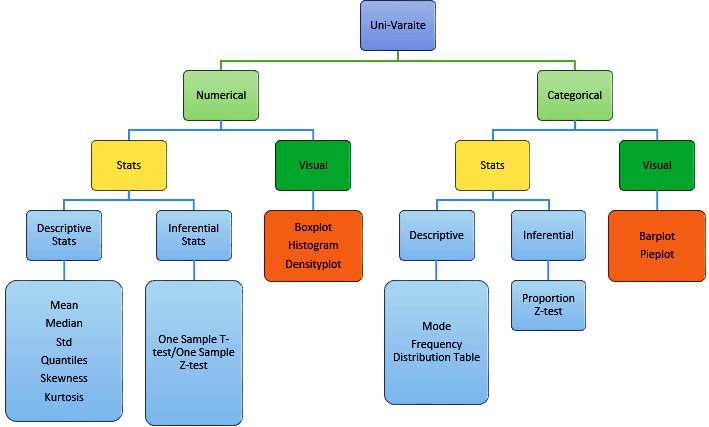

In [42]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Make                            946 non-null    object 
 1   Model                           946 non-null    object 
 2   Vehicle_Class                   946 non-null    object 
 3   Engine_Size_L                   946 non-null    float64
 4   Cylinders                       946 non-null    int64  
 5   Transmission                    946 non-null    object 
 6   Fuel_Type                       946 non-null    object 
 7   Fuel_Consumption_City_L_100_km  946 non-null    float64
 8   Fuel_Consumption_Hwy_L_100_km   946 non-null    float64
 9   Fuel_Consumption_Comb_L_100_km  946 non-null    float64
 10  Fuel_Consumption_Comb_mpg       946 non-null    int64  
 11  CO2_Emissions_g_km              946 non-null    int64  
 12  CO2_Rating                      946 

In [43]:
rawdata.columns, rawdata.dtypes

(Index(['Make', 'Model', 'Vehicle_Class', 'Engine_Size_L', 'Cylinders',
        'Transmission', 'Fuel_Type', 'Fuel_Consumption_City_L_100_km',
        'Fuel_Consumption_Hwy_L_100_km', 'Fuel_Consumption_Comb_L_100_km',
        'Fuel_Consumption_Comb_mpg', 'CO2_Emissions_g_km', 'CO2_Rating',
        'Smog_Rating'],
       dtype='object'),
 Make                               object
 Model                              object
 Vehicle_Class                      object
 Engine_Size_L                     float64
 Cylinders                           int64
 Transmission                       object
 Fuel_Type                          object
 Fuel_Consumption_City_L_100_km    float64
 Fuel_Consumption_Hwy_L_100_km     float64
 Fuel_Consumption_Comb_L_100_km    float64
 Fuel_Consumption_Comb_mpg           int64
 CO2_Emissions_g_km                  int64
 CO2_Rating                          int64
 Smog_Rating                         int64
 dtype: object)

In [44]:
rawdata.Fuel_Consumption_Comb_L_100_km.describe()

count    946.000000
mean      11.092072
std        2.876276
min        4.000000
25%        9.100000
50%       10.800000
75%       12.900000
max       26.100000
Name: Fuel_Consumption_Comb_L_100_km, dtype: float64

In [65]:
rawdata.Fuel_Consumption_Comb_L_100_km.value_counts(),rawdata.Fuel_Consumption_Comb_L_100_km.median(),rawdata.Fuel_Consumption_Comb_L_100_km.unique(),rawdata.Fuel_Consumption_Comb_L_100_km.nunique()

(9.1     20
 10.5    20
 13.8    20
 9.4     19
 12.2    18
         ..
 17.8     1
 18.1     1
 17.4     1
 17.9     1
 6.1      1
 Name: Fuel_Consumption_Comb_L_100_km, Length: 131, dtype: int64,
 10.8,
 array([ 8.6, 11.2,  9.9, 10.3,  9.8, 11. ,  8.7,  9.2, 11.6,  9.3,  9.6,
        12.3, 11.5, 13.8, 14.6,  7.6,  8.2,  8.8,  8.9,  9.1, 10. , 10.6,
         9.4, 10.8, 11.7, 15.3, 11.4, 13.7, 13.5, 15.4,  9.7, 10.9, 13.9,
        10.1,  9. , 13.2, 16.3, 12.2, 16.2, 12.5, 17. , 16. ,  8.3, 12. ,
        12.6, 12.7, 12.9, 15.1, 10.4, 15.7, 11.1,  8.5, 22.2, 26.1, 11.8,
         7.8,  7.9,  9.5, 10.2, 13. , 10.7, 14.8, 15.2, 10.5, 14.7, 14.9,
        11.3, 12.1, 14.1,  8.4,  7.5, 14.5, 19.1, 13.4, 13.1, 14. , 19.5,
        21.5, 14.4, 15.5, 15. , 16.4,  7. ,  7.2, 14.3, 15.6, 12.4,  5.8,
         5.9, 12.8, 17.9, 17.4, 18.1, 17.8, 15.8, 13.3, 16.7,  6.3, 13.6,
         5. ,  5.5,  7.1,  8. ,  6.9,  7.7,  8.1,  6.7,  6.4,  4.4,  4.2,
         4. ,  7.4, 16.5,  4.6,  5.3,  6.6, 11.9, 21.2,

In [66]:
rawdata.Fuel_Consumption_Comb_L_100_km.mean(), rawdata.Fuel_Consumption_Comb_L_100_km.median(), rawdata.Fuel_Consumption_Comb_L_100_km.std()

(11.092071881606763, 10.8, 2.8762759835335516)

**Uni-Variate analysis on Categorical** 

In [67]:
rawdata.Make.value_counts(),rawdata.Make.mode()

(ford             89
 chevrolet        80
 porsche          77
 bmw              60
 gmc              54
 toyota           51
 audi             45
 mercedes_benz    43
 jeep             34
 hyundai          29
 lexus            28
 cadillac         26
 kia              25
 nissan           23
 honda            23
 mazda            23
 dodge            21
 mini             20
 subaru           19
 volkswagen       18
 land_rover       18
 ram              16
 maserati         13
 volvo            12
 buick             9
 acura             8
 lamborghini       8
 infiniti          8
 genesis           8
 bentley           8
 jaguar            8
 lincoln           7
 mitsubishi        7
 rolls_royce       7
 alfa_romeo        6
 chrysler          6
 aston_martin      5
 bugatti           3
 fiat              1
 Name: Make, dtype: int64,
 0    ford
 Name: Make, dtype: object)

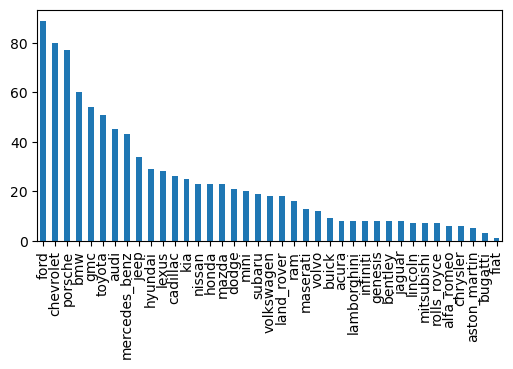

In [68]:
plt.figure(figsize=(6,3))
rawdata['Make'].value_counts().plot(kind='bar')
plt.show()

In [69]:
rawdata.Vehicle_Class.value_counts(),rawdata.Vehicle_Class.mode()

(suv_ small                 197
 suv_ standard              141
 mid_size                   117
 pickup truck_ standard     113
 subcompact                  80
 compact                     69
 full_size                   64
 two_seater                  51
 minicompact                 48
 pickup truck_ small         20
 station wagon_ small        19
 special purpose vehicle     12
 station wagon_ mid_size      8
 minivan                      7
 Name: Vehicle_Class, dtype: int64,
 0    suv_ small
 Name: Vehicle_Class, dtype: object)

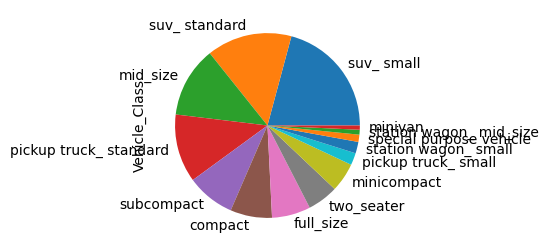

In [70]:
plt.figure(figsize=(8,3))
rawdata['Vehicle_Class'].value_counts().plot(kind='pie')
plt.show()

In [71]:
rawdata.Transmission.value_counts(),rawdata.Transmission.mode()

(Automatic_with_select_shift8     212
 Automatic8                       100
 Automatic_with_select_shift10     87
 Automated10                       72
 Manual6                           71
 Automated_manual7                 70
 Automated9                        65
 Automated_manual8                 52
 Continuously_variable             43
 Automatic_with_select_shift6      39
 Automated6                        24
 Continuously_variable8            23
 Automatic_with_select_shift9      19
 Manual7                           14
 Continuously_variable7            10
 Automated_manual6                 10
 Continuously_variable6             8
 Continuously_variable10            8
 Automaticwith_select_shift7        7
 Manual5                            5
 Continuously_variable1             4
 Automatic_with_select_shift5       2
 Automated7                         1
 Name: Transmission, dtype: int64,
 0    Automatic_with_select_shift8
 Name: Transmission, dtype: object)

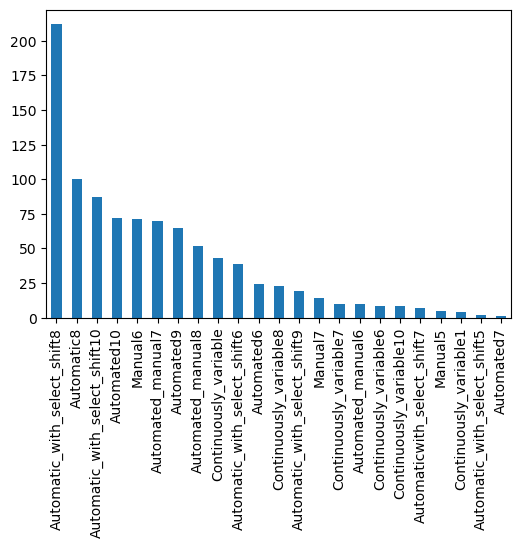

In [72]:
plt.figure(figsize=(6,4))
rawdata['Transmission'].value_counts().plot(kind='bar')
plt.show()

In [73]:
rawdata.Fuel_Type.value_counts(),rawdata.Fuel_Type.mode()

(Premium_gasoline    458
 Regular_gasoline    446
 Diesel               28
 E85                  14
 Name: Fuel_Type, dtype: int64,
 0    Premium_gasoline
 Name: Fuel_Type, dtype: object)

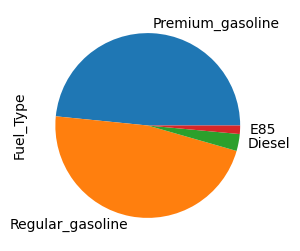

In [74]:
plt.figure(figsize=(6,3))
rawdata['Fuel_Type'].value_counts().plot(kind='pie')
plt.show()

**Complete uni-variate Analysis**


Categorical/Numeric Discrete Column: Make
Uni-Variate Descriptive Stats:
Classes: ['acura' 'alfa_romeo' 'aston_martin' 'audi' 'bentley' 'bmw' 'bugatti'
 'buick' 'cadillac' 'chevrolet' 'chrysler' 'dodge' 'fiat' 'ford' 'genesis'
 'gmc' 'honda' 'hyundai' 'infiniti' 'jaguar' 'jeep' 'kia' 'lamborghini'
 'land_rover' 'lexus' 'lincoln' 'maserati' 'mazda' 'mercedes_benz' 'mini'
 'mitsubishi' 'nissan' 'porsche' 'ram' 'rolls_royce' 'subaru' 'toyota'
 'volkswagen' 'volvo']
Number of Classes: 39
Value Counts of each class: ford             89
chevrolet        80
porsche          77
bmw              60
gmc              54
toyota           51
audi             45
mercedes_benz    43
jeep             34
hyundai          29
lexus            28
cadillac         26
kia              25
nissan           23
honda            23
mazda            23
dodge            21
mini             20
subaru           19
volkswagen       18
land_rover       18
ram              16
maserati         13
volvo            12
bu

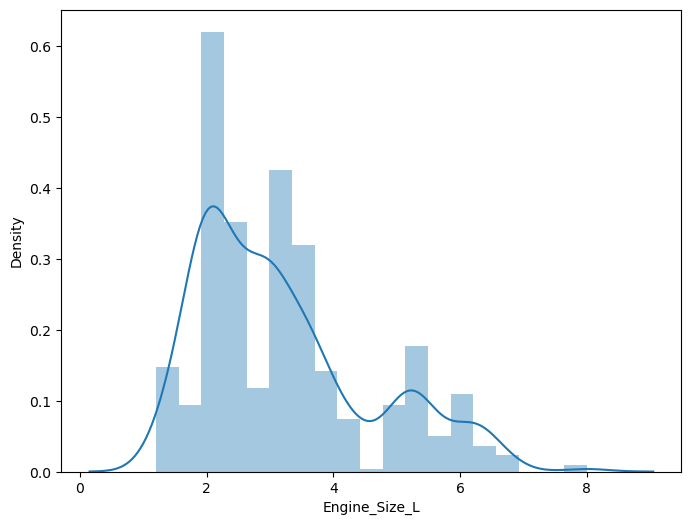


Categorical/Numeric Discrete Column: Cylinders
Uni-Variate Descriptive Stats:
Classes: [ 4  6  8 12 10  5 16  3]
Number of Classes: 8
Value Counts of each class: 4     404
6     295
8     197
3      21
12     17
10      8
16      3
5       1
Name: Cylinders, dtype: int64
Class Percent:
4     42.706131
6     31.183932
8     20.824524
3      2.219873
12     1.797040
10     0.845666
16     0.317125
5      0.105708
Name: Cylinders, dtype: float64
---------------------------------------------------
Mode Value: 4

Visual Analysis:
-----------------------------------------------------


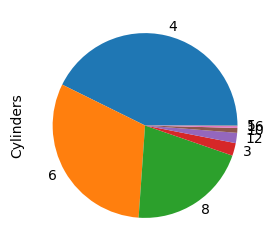


Categorical/Numeric Discrete Column: Transmission
Uni-Variate Descriptive Stats:
Classes: ['Automated_manual8' 'Automatic_with_select_shift10' 'Automatic8'
 'Automated9' 'Automated_manual7' 'Automatic_with_select_shift8' 'Manual6'
 'Automatic_with_select_shift6' 'Continuously_variable'
 'Automatic_with_select_shift9' 'Automated10' 'Automated6' 'Manual5'
 'Manual7' 'Continuously_variable7' 'Continuously_variable1'
 'Automated_manual6' 'Automaticwith_select_shift7'
 'Continuously_variable8' 'Continuously_variable6'
 'Continuously_variable10' 'Automatic_with_select_shift5' 'Automated7']
Number of Classes: 23
Value Counts of each class: Automatic_with_select_shift8     212
Automatic8                       100
Automatic_with_select_shift10     87
Automated10                       72
Manual6                           71
Automated_manual7                 70
Automated9                        65
Automated_manual8                 52
Continuously_variable             43
Automatic_with_select_shi

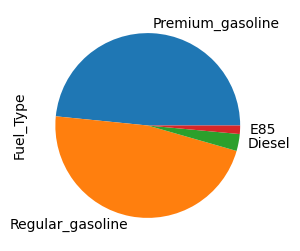


Numerical Column: Fuel_Consumption_City_L_100_km
Uni-Variate Descriptive Stats:
count    946.0
mean      13.0
std        3.0
min        4.0
25%       10.0
50%       12.0
75%       15.0
max       30.0
Name: Fuel_Consumption_City_L_100_km, dtype: float64
-----------------------------------------------------
Skewness & Kurtosis: 0.7349594929301552 , 2.04872015666988

Visual Analysis:
-----------------------------------------------------


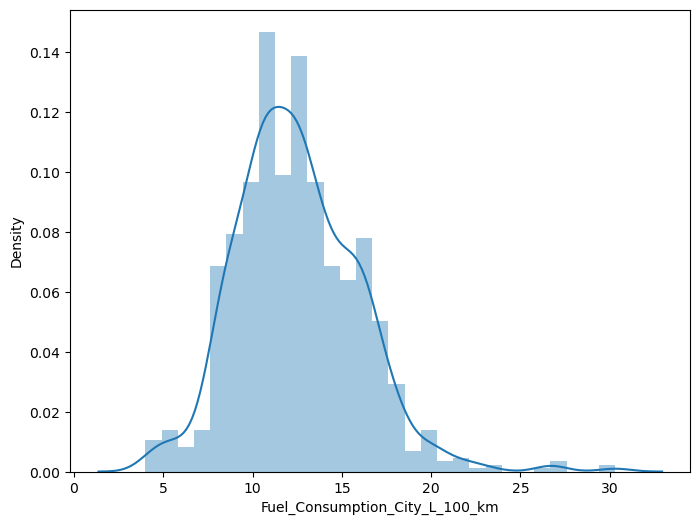


Numerical Column: Fuel_Consumption_Hwy_L_100_km
Uni-Variate Descriptive Stats:
count    946.0
mean       9.0
std        2.0
min        4.0
25%        8.0
50%        9.0
75%       11.0
max       21.0
Name: Fuel_Consumption_Hwy_L_100_km, dtype: float64
-----------------------------------------------------
Skewness & Kurtosis: 0.8088800215202532 , 1.6287426130105729

Visual Analysis:
-----------------------------------------------------


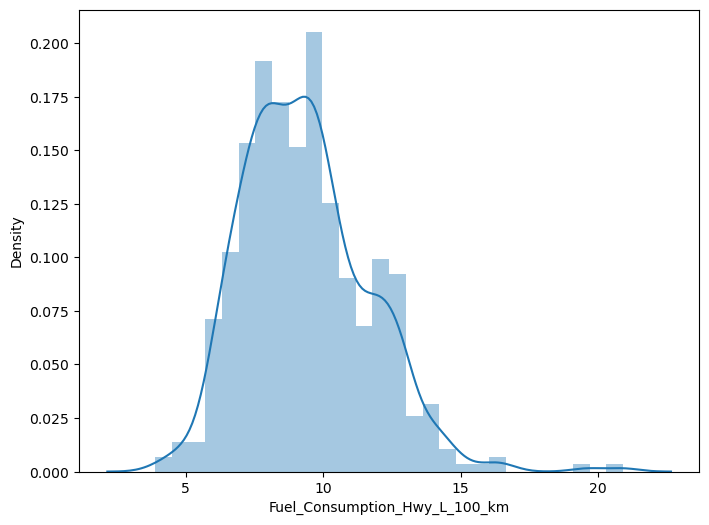


Numerical Column: Fuel_Consumption_Comb_L_100_km
Uni-Variate Descriptive Stats:
count    946.0
mean      11.0
std        3.0
min        4.0
25%        9.0
50%       11.0
75%       13.0
max       26.0
Name: Fuel_Consumption_Comb_L_100_km, dtype: float64
-----------------------------------------------------
Skewness & Kurtosis: 0.7217132371312829 , 1.7807116367007643

Visual Analysis:
-----------------------------------------------------


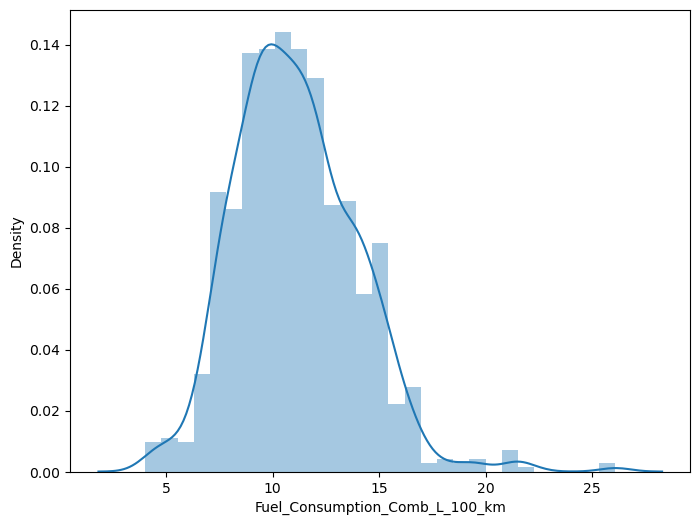


Categorical/Numeric Discrete Column: Fuel_Consumption_Comb_mpg
Uni-Variate Descriptive Stats:
Classes: [33 25 29 27 26 32 31 24 30 23 20 19 37 34 28 18 21 17 22 13 11 36 38 15
 14 40 39 49 48 16 45 56 51 35 41 42 44 64 67 71 61 53 43 47 46 58 55 63
 59]
Number of Classes: 49
Value Counts of each class: 20    69
24    66
25    60
27    57
22    57
29    53
19    50
23    49
30    48
26    48
31    47
28    34
32    32
21    30
34    27
18    27
36    24
37    24
17    21
35    16
33    15
40    12
39    12
38    11
42     9
13     6
16     4
47     3
43     3
41     3
14     3
56     2
53     2
63     2
46     2
11     2
15     2
61     2
44     2
67     1
71     1
51     1
64     1
49     1
48     1
58     1
55     1
45     1
59     1
Name: Fuel_Consumption_Comb_mpg, dtype: int64
Class Percent:
20    7.293869
24    6.976744
25    6.342495
27    6.025370
22    6.025370
29    5.602537
19    5.285412
23    5.179704
30    5.073996
26    5.073996
31    4.968288
28    3.594080
32    3.38266

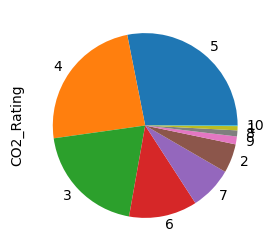


Categorical/Numeric Discrete Column: Smog_Rating
Uni-Variate Descriptive Stats:
Classes: [3 5 6 7 1]
Number of Classes: 5
Value Counts of each class: 5    308
3    198
7    194
6    189
1     57
Name: Smog_Rating, dtype: int64
Class Percent:
5    32.558140
3    20.930233
7    20.507400
6    19.978858
1     6.025370
Name: Smog_Rating, dtype: float64
---------------------------------------------------
Mode Value: 5

Visual Analysis:
-----------------------------------------------------


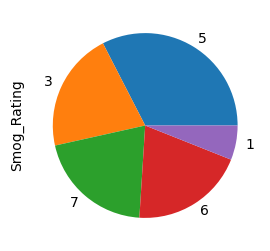

In [75]:
from simple_colors import *

for i in rawdata.columns:
    if rawdata[i].dtype == 'object' or rawdata[i].dtype == 'int32' or rawdata[i].dtype == 'int64':
        print()
        print(cyan("Categorical/Numeric Discrete Column:", ['bold']), i)
        print("=====================================================")
        print(green("Uni-Variate Descriptive Stats:", ['bold']))
        print(black("Classes:", ['bold']), rawdata[i].unique())
        print(black("Number of Classes:", ['bold']), rawdata[i].nunique())
        print(black("Value Counts of each class:", ['bold']),rawdata[i].value_counts())
        print(black('Class Percent:', ['bold']))
        print((rawdata[i].value_counts() / rawdata[i].value_counts().sum()) * 100)
        print("---------------------------------------------------")
        print(black("Mode Value:", ['bold']), rawdata[i].mode()[0])
        if rawdata[i].nunique() <= 10:
            print()
            print(magenta("Visual Analysis:", ['bold']))
            print("-----------------------------------------------------")
            plt.figure(figsize=(8, 3))
            rawdata[i].value_counts().plot(kind='pie')
            plt.show()

    elif rawdata[i].dtype != 'object':
        print()
        print(blue("Numerical Column:", ['bold']), i)
        print("=====================================================")
        print(green("Uni-Variate Descriptive Stats:", ['bold']))
        print(round(rawdata[i].describe(), ))
        print("-----------------------------------------------------")
        print(black("Skewness & Kurtosis:", ['bold']), rawdata[i].skew(), ",",
              rawdata[i].kurt())
        print()
        print(cyan("Visual Analysis:", ['bold']))
        print("-----------------------------------------------------")
        plt.figure(figsize=(8, 6))
        sns.distplot(rawdata[i])
        
        #data[i].plot(kind = 'density')
        
        plt.show()

**Uni-Variate analysis** 

**On Numerical columns**

In [76]:
rawdata['Cylinders'].describe(),rawdata['Cylinders'].skew(),rawdata['Cylinders'].kurtosis()

(count    946.000000
 mean       5.668076
 std        1.932670
 min        3.000000
 25%        4.000000
 50%        6.000000
 75%        6.000000
 max       16.000000
 Name: Cylinders, dtype: float64,
 1.2500160742704411,
 2.6656716309626205)

<Axes: title={'center': 'Boxplot of price'}, ylabel='Cylinders'>

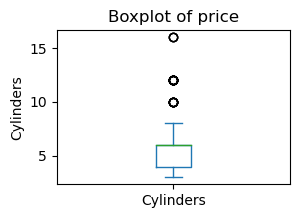

In [77]:
rawdata.Cylinders.plot(kind='box',title='Boxplot of price',ylabel='Cylinders',figsize=(3,2))

In [78]:
rawdata['Fuel_Consumption_City_L_100_km'].describe(),rawdata['Fuel_Consumption_City_L_100_km'].skew(),rawdata['Fuel_Consumption_City_L_100_km'].kurtosis()

(count    946.000000
 mean      12.506448
 std        3.452043
 min        4.000000
 25%       10.200000
 50%       12.200000
 75%       14.700000
 max       30.300000
 Name: Fuel_Consumption_City_L_100_km, dtype: float64,
 0.7349594929301552,
 2.04872015666988)

<Axes: ylabel='Frequency'>

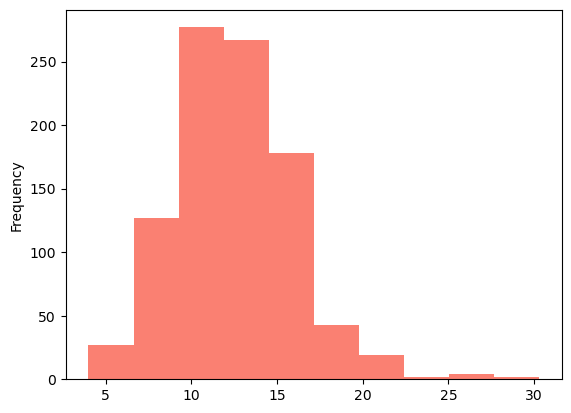

In [79]:
rawdata.Fuel_Consumption_City_L_100_km.plot(kind = 'hist',color='Salmon')

In [80]:
rawdata['Fuel_Consumption_Hwy_L_100_km'].describe(),rawdata['Fuel_Consumption_Hwy_L_100_km'].skew(),rawdata['Fuel_Consumption_Hwy_L_100_km'].kurtosis()

(count    946.000000
 mean       9.363319
 std        2.285125
 min        3.900000
 25%        7.700000
 50%        9.200000
 75%       10.700000
 max       20.900000
 Name: Fuel_Consumption_Hwy_L_100_km, dtype: float64,
 0.8088800215202532,
 1.6287426130105729)

<Axes: ylabel='Density'>

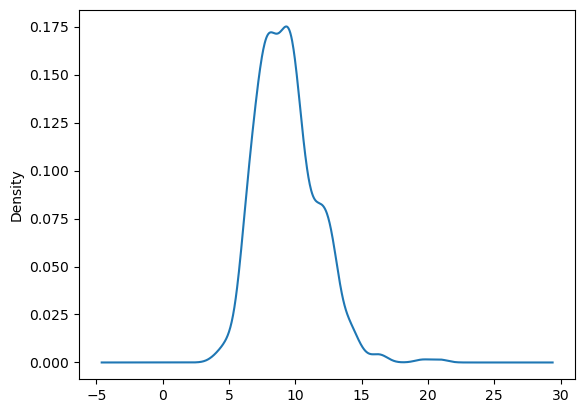

In [81]:
rawdata.Fuel_Consumption_Hwy_L_100_km.plot(kind='density')

In [82]:
rawdata['Fuel_Consumption_Comb_L_100_km'].describe(),rawdata['Fuel_Consumption_Comb_L_100_km'].skew(),rawdata['Fuel_Consumption_Comb_L_100_km'].kurtosis()

(count    946.000000
 mean      11.092072
 std        2.876276
 min        4.000000
 25%        9.100000
 50%       10.800000
 75%       12.900000
 max       26.100000
 Name: Fuel_Consumption_Comb_L_100_km, dtype: float64,
 0.7217132371312829,
 1.7807116367007643)

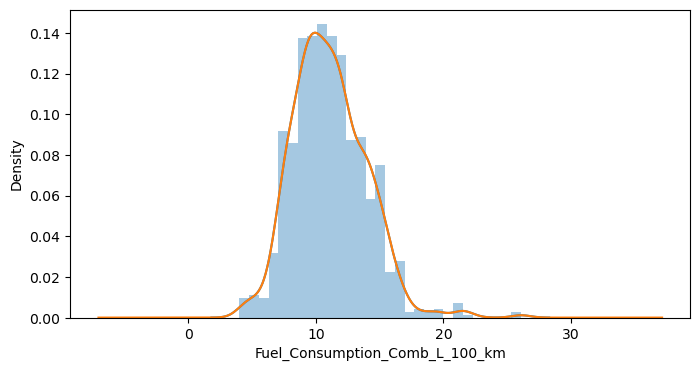

In [83]:
plt.figure(figsize=(8, 4))
sns.distplot(rawdata['Fuel_Consumption_Comb_L_100_km'])
rawdata['Fuel_Consumption_Comb_L_100_km'].plot(kind = 'density')
plt.show()

In [84]:
rawdata['Fuel_Consumption_Comb_mpg'].describe(),rawdata['Fuel_Consumption_Comb_mpg'].skew(),rawdata['Fuel_Consumption_Comb_mpg'].kurtosis()

(count    946.000000
 mean      27.247357
 std        7.685217
 min       11.000000
 25%       22.000000
 50%       26.000000
 75%       31.000000
 max       71.000000
 Name: Fuel_Consumption_Comb_mpg, dtype: float64,
 1.449486744264081,
 4.247218774450183)

<Axes: ylabel='Fuel_Consumption_Comb_mpg'>

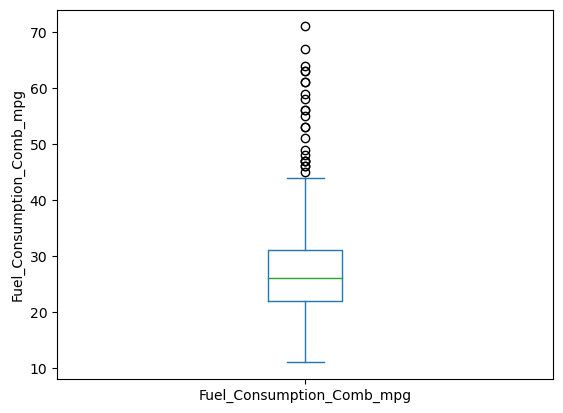

In [85]:
rawdata.Fuel_Consumption_Comb_mpg.plot(kind='box',ylabel='Fuel_Consumption_Comb_mpg')

In [86]:
rawdata['CO2_Emissions_g_km'].describe(),rawdata['CO2_Emissions_g_km'].skew(),rawdata['CO2_Emissions_g_km'].kurtosis()

(count    946.000000
 mean     259.172304
 std       64.443149
 min       94.000000
 25%      213.250000
 50%      257.000000
 75%      300.750000
 max      608.000000
 Name: CO2_Emissions_g_km, dtype: float64,
 0.5533439604626593,
 1.6772090837434837)

<Axes: ylabel='Density'>

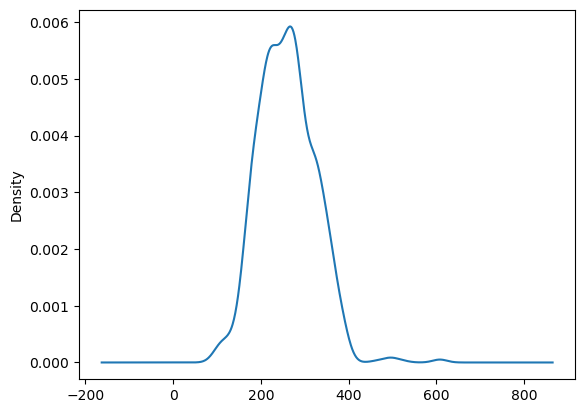

In [87]:
rawdata.CO2_Emissions_g_km.plot(kind='density',ylabel='CO2_Emissions_g_km')

In [88]:
rawdata['CO2_Rating'].describe(),rawdata['CO2_Rating'].skew(),rawdata['CO2_Rating'].kurtosis()

(count    946.000000
 mean       4.539112
 std        1.471799
 min        1.000000
 25%        3.000000
 50%        5.000000
 75%        5.000000
 max       10.000000
 Name: CO2_Rating, dtype: float64,
 0.44803205594790424,
 0.34378185769688585)

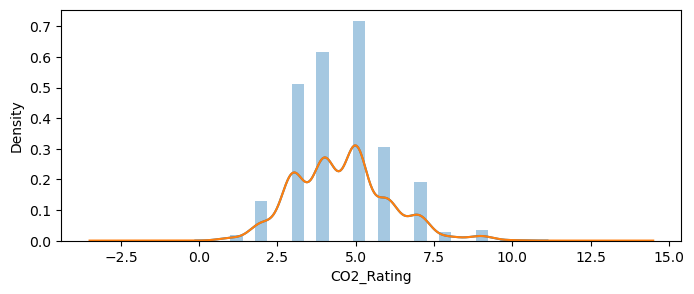

In [89]:
plt.figure(figsize=(8, 3))
sns.distplot(rawdata['CO2_Rating'])
rawdata['CO2_Rating'].plot(kind = 'density')
plt.show()

In [90]:
rawdata['Smog_Rating'].describe(),rawdata['Smog_Rating'].skew(),rawdata['Smog_Rating'].kurtosis()

(count    946.000000
 mean       4.950317
 std        1.679842
 min        1.000000
 25%        3.000000
 50%        5.000000
 75%        6.000000
 max        7.000000
 Name: Smog_Rating, dtype: float64,
 -0.6920244556228506,
 -0.28147628049035145)

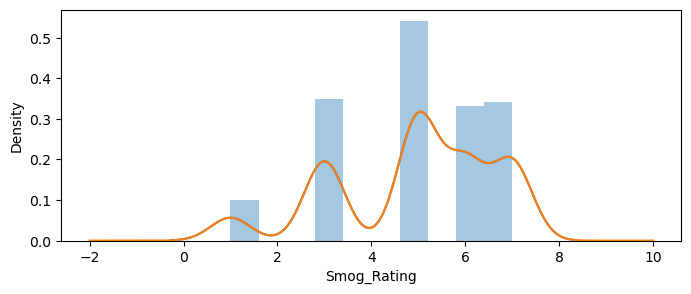

In [91]:
plt.figure(figsize=(8, 3))
sns.distplot(rawdata['Smog_Rating'])
rawdata['Smog_Rating'].plot(kind = 'density')
plt.show()

**Bi-Variate analysis on N-N**

**Data Study between two columns**

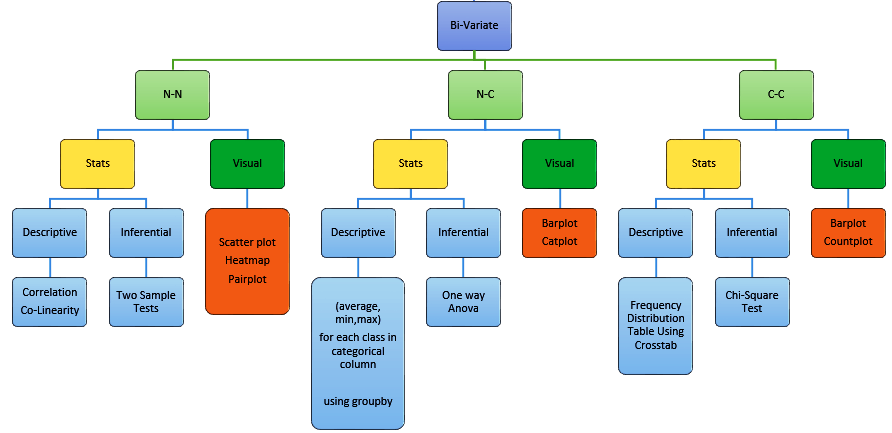

**Numerical to Numerical**

In [92]:
rawdata.head()

,Make,Model,Vehicle_Class,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L_100_km,Fuel_Consumption_Hwy_L_100_km,Fuel_Consumption_Comb_L_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km,CO2_Rating,Smog_Rating
0,acura,ilx,compact,2.4,4,Automated_manual8,Premium_gasoline,9.9,7.0,8.6,33,200,6,3
1,acura,mdx_sh_awd,suv_ small,3.5,6,Automatic_with_select_shift10,Premium_gasoline,12.6,9.4,11.2,25,263,4,5
2,acura,rdx_sh_awd,suv_ small,2.0,4,Automatic_with_select_shift10,Premium_gasoline,11.0,8.6,9.9,29,232,5,6
3,acura,rdx_sh_awd_a_spec,suv_ small,2.0,4,Automatic_with_select_shift10,Premium_gasoline,11.3,9.1,10.3,27,242,5,6
4,acura,tlx_sh_awd,compact,2.0,4,Automatic_with_select_shift10,Premium_gasoline,11.2,8.0,9.8,29,230,5,7


In [93]:
rawdata[['Fuel_Consumption_City_L_100_km', 'Fuel_Consumption_Comb_L_100_km']].corr()

,Fuel_Consumption_City_L_100_km,Fuel_Consumption_Comb_L_100_km
Fuel_Consumption_City_L_100_km,1.000000,0.990321
Fuel_Consumption_Comb_L_100_km,0.990321,1.000000


<Axes: xlabel='Fuel_Consumption_City_L_100_km', ylabel='Fuel_Consumption_Comb_L_100_km'>

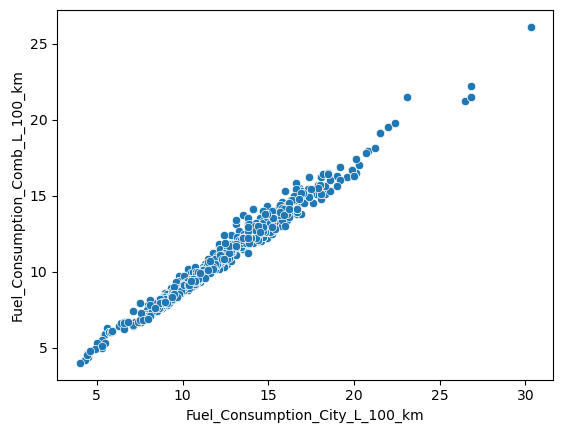

In [94]:
sns.scatterplot(rawdata, x='Fuel_Consumption_City_L_100_km', y='Fuel_Consumption_Comb_L_100_km')

In [95]:
rawdata[['Fuel_Consumption_Hwy_L_100_km', 'Fuel_Consumption_Comb_L_100_km']].corr()

,Fuel_Consumption_Hwy_L_100_km,Fuel_Consumption_Comb_L_100_km
Fuel_Consumption_Hwy_L_100_km,1.000000,0.967138
Fuel_Consumption_Comb_L_100_km,0.967138,1.000000


<Axes: xlabel='Fuel_Consumption_Hwy_L_100_km', ylabel='Fuel_Consumption_Comb_L_100_km'>

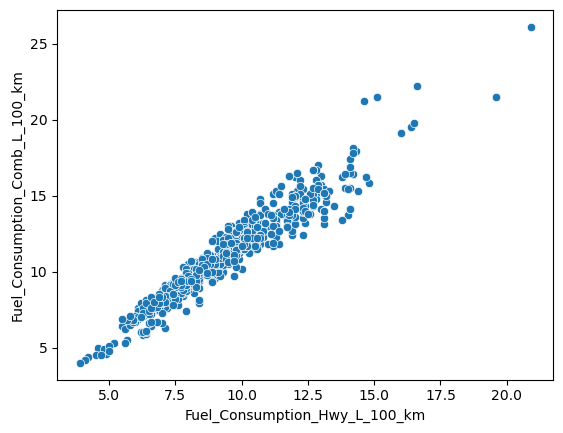

In [96]:
sns.scatterplot(rawdata, x='Fuel_Consumption_Hwy_L_100_km', y='Fuel_Consumption_Comb_L_100_km')

In [97]:
rawdata[['CO2_Rating', 'Fuel_Consumption_Comb_L_100_km']].corr()

,CO2_Rating,Fuel_Consumption_Comb_L_100_km
CO2_Rating,1.000000,-0.927705
Fuel_Consumption_Comb_L_100_km,-0.927705,1.000000


<Axes: xlabel='CO2_Rating', ylabel='Fuel_Consumption_Comb_L_100_km'>

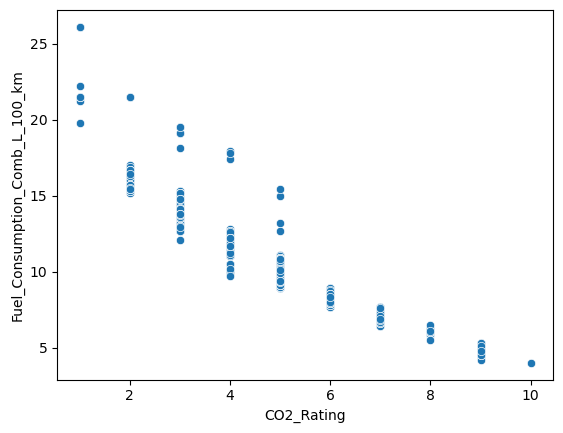

In [98]:
sns.scatterplot(rawdata, x='CO2_Rating', y='Fuel_Consumption_Comb_L_100_km')

**Numerical - categorical**

In [99]:
rawdata.head(2)

,Make,Model,Vehicle_Class,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L_100_km,Fuel_Consumption_Hwy_L_100_km,Fuel_Consumption_Comb_L_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km,CO2_Rating,Smog_Rating
0,acura,ilx,compact,2.4,4,Automated_manual8,Premium_gasoline,9.9,7.0,8.6,33,200,6,3
1,acura,mdx_sh_awd,suv_ small,3.5,6,Automatic_with_select_shift10,Premium_gasoline,12.6,9.4,11.2,25,263,4,5


In [100]:
((rawdata.groupby("Make")['Fuel_Consumption_Comb_L_100_km'].mean()/len(rawdata))*100).sort_values(ascending  = False)

Make
bugatti          2.621564
lamborghini      1.901427
rolls_royce      1.747206
bentley          1.547304
gmc              1.407486
maserati         1.395349
dodge            1.392832
aston_martin     1.378436
land_rover       1.361875
chevrolet        1.328224
porsche          1.293073
ram              1.275766
ford             1.266242
jaguar           1.264535
bmw              1.252995
genesis          1.189218
jeep             1.181756
chrysler         1.176885
infiniti         1.172040
cadillac         1.168889
lincoln          1.168831
audi             1.140709
mercedes_benz    1.101087
acura            1.080867
alfa_romeo       1.069415
lexus            1.037828
volvo            0.994538
buick            0.979563
fiat             0.961945
subaru           0.955825
volkswagen       0.948438
nissan           0.928854
toyota           0.907847
mazda            0.896222
mitsubishi       0.880399
mini             0.875264
kia              0.867230
honda            0.866348
hyundai

<Axes: ylabel='Make'>

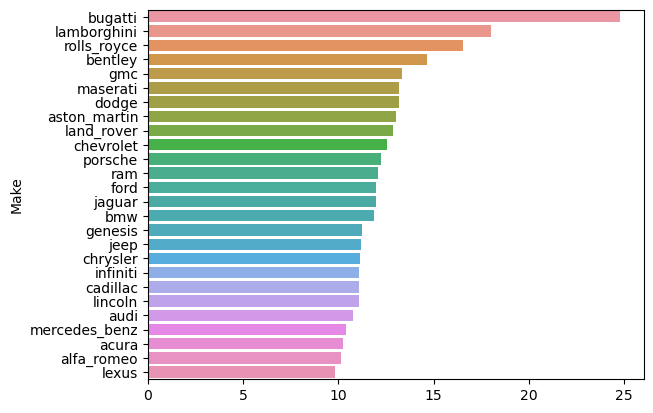

In [101]:
sns.barplot(y = rawdata.groupby('Make')['Fuel_Consumption_Comb_L_100_km'].mean().sort_values(
    ascending=False).index[0:26],
            x = rawdata.groupby('Make')['Fuel_Consumption_Comb_L_100_km'].mean().sort_values(
                ascending=False).values[0:26],
            orient ='h')

In [102]:
((rawdata.groupby("Transmission")['Fuel_Consumption_Comb_L_100_km'].mean()/len(rawdata))*100).sort_values(ascending  = False)

Transmission
Automated6                       1.478154
Automatic_with_select_shift5     1.458774
Automated10                      1.412673
Manual7                          1.306252
Automatic_with_select_shift10    1.291342
Automatic8                       1.284249
Automated_manual8                1.260774
Automaticwith_select_shift7      1.242827
Automated_manual7                1.211265
Automatic_with_select_shift8     1.195102
Automatic_with_select_shift9     1.113831
Manual6                          1.106363
Automated9                       1.103757
Automatic_with_select_shift6     1.012902
Continuously_variable8           0.914147
Automated7                       0.898520
Continuously_variable7           0.852008
Manual5                          0.832981
Continuously_variable6           0.802061
Continuously_variable10          0.792812
Continuously_variable1           0.721459
Continuously_variable            0.717833
Automated_manual6                0.554968
Name: Fuel_Consumptio

<Axes: ylabel='Transmission'>

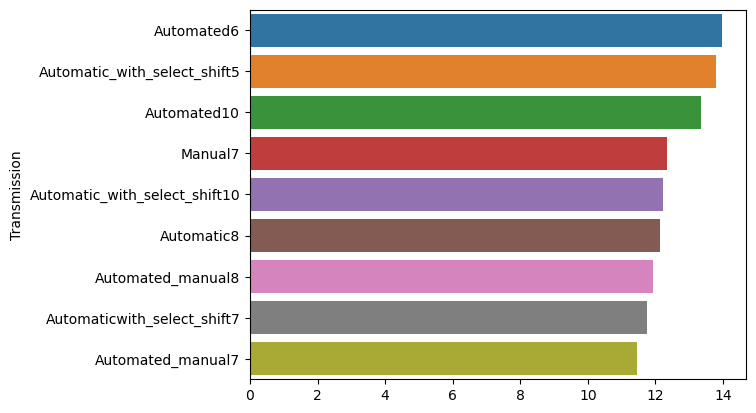

In [103]:
sns.barplot(y = rawdata.groupby('Transmission')['Fuel_Consumption_Comb_L_100_km'].mean().sort_values(
    ascending=False).index[0:9],
            x = rawdata.groupby('Transmission')['Fuel_Consumption_Comb_L_100_km'].mean().sort_values(
                ascending=False).values[0:9],
            orient ='h')

In [104]:
((rawdata.groupby("Vehicle_Class")['Fuel_Consumption_Comb_L_100_km'].mean()/len(rawdata))*100).sort_values(ascending  = False)

Vehicle_Class
pickup truck_ standard     1.437819
two_seater                 1.388923
suv_ standard              1.354265
station wagon_ mid_size    1.289641
minicompact                1.264315
pickup truck_ small        1.177061
full_size                  1.154367
special purpose vehicle    1.139006
subcompact                 1.122357
mid_size                   1.036483
suv_ small                 1.033902
minivan                    1.022350
compact                    0.934522
station wagon_ small       0.867364
Name: Fuel_Consumption_Comb_L_100_km, dtype: float64

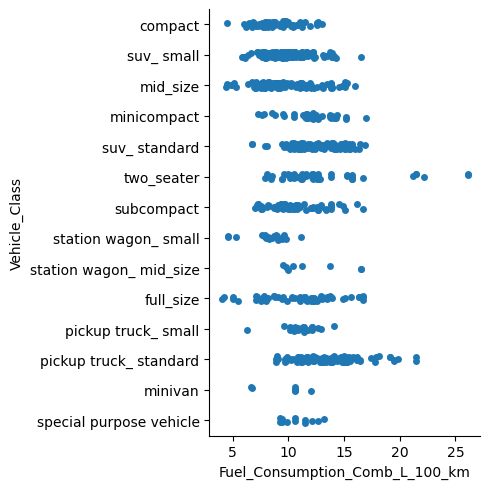

In [105]:
sns.catplot(y='Vehicle_Class', x ='Fuel_Consumption_Comb_L_100_km', data = rawdata, orient='h')

In [106]:
rawdata.corr() 

,Engine_Size_L,Cylinders,Fuel_Consumption_City_L_100_km,Fuel_Consumption_Hwy_L_100_km,Fuel_Consumption_Comb_L_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km,CO2_Rating,Smog_Rating
Engine_Size_L,1.000000,0.920698,0.834925,0.749374,0.818694,-0.704163,0.824188,-0.766333,-0.448239
Cylinders,0.920698,1.000000,0.845688,0.737652,0.821718,-0.693594,0.833241,-0.762157,-0.502149
Fuel_Consumption_City_L_100_km,0.834925,0.845688,1.000000,0.922850,0.990321,-0.909477,0.965632,-0.920524,-0.523928
Fuel_Consumption_Hwy_L_100_km,0.749374,0.737652,0.922850,1.000000,0.967138,-0.877531,0.933991,-0.894668,-0.402099
Fuel_Consumption_Comb_L_100_km,0.818694,0.821718,0.990321,0.967138,1.000000,-0.914305,0.971671,-0.927705,-0.490473
Fuel_Consumption_Comb_mpg,-0.704163,-0.693594,-0.909477,-0.877531,-0.914305,1.000000,-0.913019,0.949561,0.473990
CO2_Emissions_g_km,0.824188,0.833241,0.965632,0.933991,0.971671,-0.913019,1.000000,-0.954593,-0.520437
CO2_Rating,-0.766333,-0.762157,-0.920524,-0.894668,-0.927705,0.949561,-0.954593,1.000000,0.502625
Smog_Rating,-0.448239,-0.502149,-0.523928,-0.402099,-0.490473,0.473990,-0.520437,0.502625,1.000000


<Axes: >

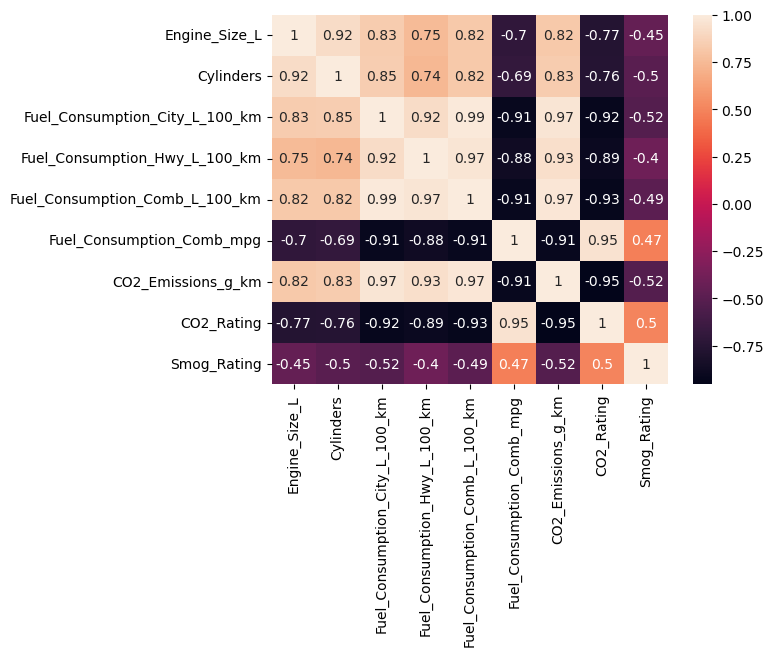

In [107]:
sns.heatmap(rawdata.corr(),annot = True)

**Categorical to Categorical**

In [108]:
rawdata.head(2)

,Make,Model,Vehicle_Class,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L_100_km,Fuel_Consumption_Hwy_L_100_km,Fuel_Consumption_Comb_L_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km,CO2_Rating,Smog_Rating
0,acura,ilx,compact,2.4,4,Automated_manual8,Premium_gasoline,9.9,7.0,8.6,33,200,6,3
1,acura,mdx_sh_awd,suv_ small,3.5,6,Automatic_with_select_shift10,Premium_gasoline,12.6,9.4,11.2,25,263,4,5


In [109]:
pd.crosstab(rawdata.Transmission,rawdata.Fuel_Type, margins=True)

Fuel_Type,Diesel,E85,Premium_gasoline,Regular_gasoline,All
Transmission,,,,,
Automated10,16,0,20,36,72
Automated6,5,6,0,13,24
Automated7,0,0,0,1,1
Automated9,0,0,33,32,65
Automated_manual6,0,0,0,10,10
Automated_manual7,0,0,60,10,70
Automated_manual8,0,0,47,5,52
Automatic8,7,0,33,60,100
Automatic_with_select_shift10,0,6,25,56,87


<Axes: xlabel='count', ylabel='Transmission'>

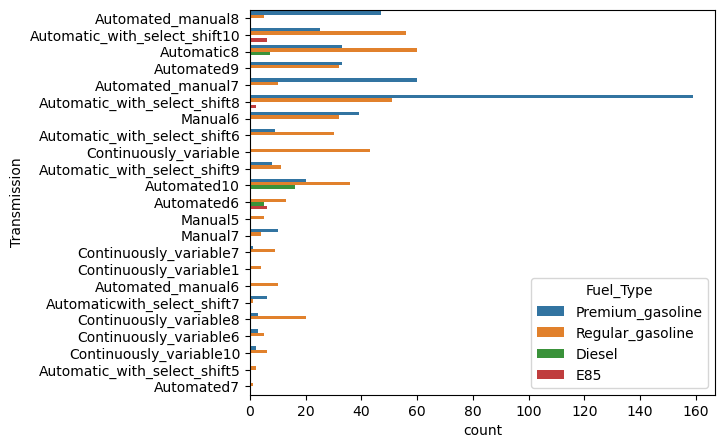

In [110]:
plt.figure(figsize=(6, 5))
sns.countplot(y='Transmission', hue='Fuel_Type', data = rawdata)

### Overall Insights on data
#### The provided Exploratory Data Analysis (EDA), here are several insights derived from the analysis of the Fuel_consumption dataset:

* Ford has highest value counts in make
* Suv_small has highest value counts in the Vehicle class 
* Automatic with select shift8 has the highest value counts in the Transmission
* Premium gasoline has the highest value counts in the Fuel type
* Ford has highest value counts with 89 and fiat has least value counts with 1
* Suv small occupies 20% of the data and minivan occupies 0.7% of the data
* Engine_size_L has minimum 1 and maximum 8 
* Engine_size_L has postive skewness
* Most vehicles have 4 cylinders with a value count of 404 with percentage of 42%.
* Automatic_with_select_shift8 transmission leads with 212 value count with percentage of 22%.
* Fuel_type premium_gasoline have highest value counts of 458 with a percentage 48%.
* Fuel_Consumption_City_L_100_km of a vehicle minimum's at 4 and maximum's at 30.
* Fuel_Consumption_Hwy_L_100_km of a vehicle minimum's at 4 and maximum's at 21.
* Fuel_Consumption_Comb_L_100_km of a vehicle minimum's at 4 and maximum's at 26.
* Fuel_Consumption_Comb_mpg of a vehicle with a value count of 69.
* CO2_Emissions_g_km 275(g/km) with a value count of 15.
* CO2_Rating of a vehicle has 5 rating with a value count of 266 with a percentage of 1.5%.
* Smog_Rating of a vehicle has 5 rating with a value count of 308 with a percentage of 32%. 
* There are outliers in Cylinders column.
* Fuel_Consumption_Hwy_L_100_km follows normal distribution
* Fuel_Consumption_Comb_L_100_km follows normal distribution 
* There are outliers in Fuel_Consumption_Comb_mpg. 
* CO2_Emissions_g_km follows normal distribution
* CO2_Rating Maximum density at 5
* Smog_Rating Maximum density at 5
* For Fuel_Consumption_City_L_100_km and Fuel_Consumption_Comb_L_100_km have 99% of correlation 
* For Fuel_Consumption_Hwy_L_100_km and Fuel_Consumption_Comb_L_100_km have 96% of correlation. 
* For CO2_Rating and Fuel_Consumption_Comb_L_100_km have -0.92 negative correlation occur
* In Fuel_Consumption_Comb_L_100_km Bugatti has highest value
* Automated6 has hightest in the Transmission and Fuel_Consumption_Comb_L_100_km
* Two seater is more data in the Vehicle_Class and Fuel_Consumption_Comb_L_100_km
* Automatic with select shift6 has hightest premium gasoline in the transmission.

### Predictive Modelling<a id='pm'>
[Back To Top](#menu)

**Predictive modelling**
    
* Above data will be given to a machine learning model, where the model will be trained on column data Fuel_Consumption with other columns data.     
    
* predictive modeling is sending data to a algorithm as input columns(x) along with one output column data (y), training y data with x
    
    model: y~x -> y = f(x)+e

### 3. x , y <a id='xy'>
[Back To Top](#menu)

* This is the method where to identify according to business goal,output as y and x as input column 


In [111]:
# input column
x = rawdata.drop('Fuel_Consumption_Comb_L_100_km',axis = 1) #storing input columns in X and dropping output column

# output column 
y = rawdata['Fuel_Consumption_Comb_L_100_km'] #droped output column will be added to y

* We are predicting the Fuel_Consumption values, so the ouput column will be Fuel_Consumption_Comb_L_100_km, and remaining are input columns

In [112]:
x.shape,y.shape # After modifying checking shape of the data.

((946, 13), (946,))

In [113]:
x.head(2)

,Make,Model,Vehicle_Class,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L_100_km,Fuel_Consumption_Hwy_L_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km,CO2_Rating,Smog_Rating
0,acura,ilx,compact,2.4,4,Automated_manual8,Premium_gasoline,9.9,7.0,33,200,6,3
1,acura,mdx_sh_awd,suv_ small,3.5,6,Automatic_with_select_shift10,Premium_gasoline,12.6,9.4,25,263,4,5


In [114]:
y.head(2)

0     8.6
1    11.2
Name: Fuel_Consumption_Comb_L_100_km, dtype: float64

### 4. Feature Selection of X<a id='fsox'>
[Back To Top](#menu)

* This is method,according to business goal,checking taken input columns are important to our goal/model and if not important considering dropping of columns,for the modelling process. 

* Feature selection/Deletion

The above step can be done through the help of EDA and Business decisions

* Feature Modification (Changing the Values)
* Feature Generation (Creating New Features)
    - We have done some necessary feature modification in Validation Step
    - We will be also doing some necessary steps in data pre-processing

The above steps already taken in Data Validation

In [115]:
x.head(3)

,Make,Model,Vehicle_Class,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L_100_km,Fuel_Consumption_Hwy_L_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km,CO2_Rating,Smog_Rating
0,acura,ilx,compact,2.4,4,Automated_manual8,Premium_gasoline,9.9,7.0,33,200,6,3
1,acura,mdx_sh_awd,suv_ small,3.5,6,Automatic_with_select_shift10,Premium_gasoline,12.6,9.4,25,263,4,5
2,acura,rdx_sh_awd,suv_ small,2.0,4,Automatic_with_select_shift10,Premium_gasoline,11.0,8.6,29,232,5,6


In [116]:
x.columns

Index(['Make', 'Model', 'Vehicle_Class', 'Engine_Size_L', 'Cylinders',
       'Transmission', 'Fuel_Type', 'Fuel_Consumption_City_L_100_km',
       'Fuel_Consumption_Hwy_L_100_km', 'Fuel_Consumption_Comb_mpg',
       'CO2_Emissions_g_km', 'CO2_Rating', 'Smog_Rating'],
      dtype='object')

* Model column is not important for modelling.

In [117]:
del x['Model']

* Considering remaining all columns for modelling.

### 5. Train-Test Split<a id='tts'>
[Back To Top](#menu)
* This is a method where we divide data into 70:30 as train and test for x and ydata,predictive modelling 
* Dividing Data (x,y) into train and test (Data Validation)
* for this we will use sklearn module
* we can go with 70,30 or 80,20 or 75,25 ratios

In [118]:
from sklearn.model_selection import train_test_split # Importing traintestsplit for modelselection

In [119]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state = 123) # randomstate used for not mismatching the data

In [120]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape # Checeking shapes of the data as it is correctly trained or not

((662, 12), (284, 12), (662,), (284,))

In [121]:
xtrain = xtrain.reset_index(drop = True)
xtest = xtest.reset_index(drop = True)
ytrain = ytrain.reset_index(drop = True)
ytest = ytest.reset_index(drop = True)
# To set index in order after dividing data we use reset_index

* xtrain, ytrain data is used for the training predictive model

* xtest is used for the predictions , ytest is used for the comparissions

### 6. Na & Outliers of Train & Test <a id='nott'>
[Back To Top](#menu)

* Identifying missing values by isnull() function.

**Checking Missing Values**

In [122]:
xtrain.isnull().sum()

Make                              0
Vehicle_Class                     0
Engine_Size_L                     0
Cylinders                         0
Transmission                      0
Fuel_Type                         0
Fuel_Consumption_City_L_100_km    0
Fuel_Consumption_Hwy_L_100_km     0
Fuel_Consumption_Comb_mpg         0
CO2_Emissions_g_km                0
CO2_Rating                        0
Smog_Rating                       0
dtype: int64

In [123]:
xtest.isnull().sum()

Make                              0
Vehicle_Class                     0
Engine_Size_L                     0
Cylinders                         0
Transmission                      0
Fuel_Type                         0
Fuel_Consumption_City_L_100_km    0
Fuel_Consumption_Hwy_L_100_km     0
Fuel_Consumption_Comb_mpg         0
CO2_Emissions_g_km                0
CO2_Rating                        0
Smog_Rating                       0
dtype: int64

* There is no null values in the given data

**Outliers Handling**

<Axes: >

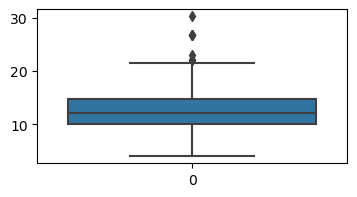

In [124]:
plt.figure(figsize=(4,2))
sns.boxplot(xtrain.Fuel_Consumption_City_L_100_km)

* In [Fuel_Consumption_City_L_100_km] column we have upper out liers.

<Axes: >

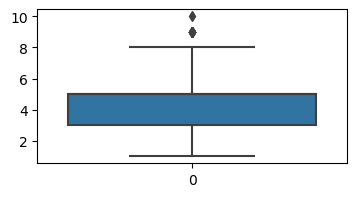

In [125]:
plt.figure(figsize=(4,2))
sns.boxplot(xtrain.CO2_Rating)

* In [CO2_Rating] column we have upper out liers.

* The below code used for detecting outliers.

In [126]:
def outlier_detect(df):
    for i in df.describe().columns:
        print("Column:",i)
        print("------------------------------------------------")
        Q1 = df.describe().at['25%',i]
        Q3 = df.describe().at['75%',i]
        IQR = Q3 - Q1
        LTV = Q1 - 1.5 * IQR
        UTV = Q3 + 1.5 * IQR
        print("Lower Outliers:")
        print()
        lowerout = list(df[df[i]<LTV][i])
        lowerout.sort()
        print(lowerout)
        print()        
        print("Upper Outliers:")
        print()
        upperout = list(df[df[i]>UTV][i])
        upperout.sort()
        print(upperout) 
        print()

In [127]:
outlier_detect(xtest)

Column: Engine_Size_L
------------------------------------------------
Lower Outliers:

[]

Upper Outliers:

[8.0]

Column: Cylinders
------------------------------------------------
Lower Outliers:

[]

Upper Outliers:

[10, 10, 10, 12, 12, 12, 16]

Column: Fuel_Consumption_City_L_100_km
------------------------------------------------
Lower Outliers:

[]

Upper Outliers:

[21.5, 22.4, 23.1, 26.5, 30.3]

Column: Fuel_Consumption_Hwy_L_100_km
------------------------------------------------
Lower Outliers:

[]

Upper Outliers:

[16.0, 16.5, 19.6, 20.9]

Column: Fuel_Consumption_Comb_mpg
------------------------------------------------
Lower Outliers:

[]

Upper Outliers:

[46, 47, 48, 49, 58, 59, 63]

Column: CO2_Emissions_g_km
------------------------------------------------
Lower Outliers:

[]

Upper Outliers:

[465, 489, 608]

Column: CO2_Rating
------------------------------------------------
Lower Outliers:

[]

Upper Outliers:

[9, 9, 9]

Column: Smog_Rating
---------------------

In [128]:
def outlier_replacement(df):
    for i in df.describe().columns:
        Q1 = df.describe().at['25%',i]
        Q3 = df.describe().at['75%',i]
        IQR = Q3 - Q1
        LTV = Q1 - 1.5 * IQR
        UTV = Q3 + 1.5 * IQR
        
        # replacement vals
        median = df[i].median()
        low_bound = LTV
        high_bound = UTV
        fifth = df[i].quantile(0.05)
        ninetyfifth = df[i].quantile(0.95)
        
        # mask method is used to replace the values
        df[i] = df[i].mask(df[i]<LTV, low_bound) # replacing the outlier with ltv (25% value)
        df[i] = df[i].mask(df[i]>UTV, high_bound) # replacing the outlier with utv (75% value)

In [1]:
outlier_replacement(xtrain)

NameError: name 'outlier_replacement' is not defined

In [ ]:
outlier_replacement(xtest)

* Above we have handled the outliers,by using IQR and median.

### 7. Pre-Processing of xtrain & xtest<a id='ppxt'>
[Back To Top](#menu)

**7.1 Categorical to Numerical (Encoding)**

Machine needs data in numeric format, so we need to convert categorical to numerical, while observing the number of classes , because it will increase the dimensionality if we are converting them to one hot encoding.

* Label Encoding for ordinal
    - lets assume cat column data : verygood,good,poor
    - ordinal - verygood>good>poor
                3>2>1
* One hot encodig for nominal
    - lets assume cat column data: a, b, c

a|b|c
--|--|--
1|0|0
1|0|0
0|1|0
0|0|1

**Label encoding**
* Here we are giving manually without using label encoder function.

Regular_gasoline  >  Premium_gasoline  >  Diesel  >  E85

    1    >        2           >      3   >    4

In [131]:
xtrain.Fuel_Type.replace({'Regular_gasoline':1,
                 'Premium_gasoline':2,
                 'Diesel':3,
                 'E85':4},inplace = True)

In [132]:
xtest.Fuel_Type.replace({'Regular_gasoline':1,
                 'Premium_gasoline':2,
                 'Diesel':3,
                 'E85':4},inplace = True)

In [133]:
xtrain

,Make,Vehicle_Class,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L_100_km,Fuel_Consumption_Hwy_L_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km,CO2_Rating,Smog_Rating
0,gmc,suv_ standard,5.3,8,Automated10,1,15.8,11.8,20.0,327.0,3,6
1,bugatti,two_seater,6.5,9,Automated_manual7,2,21.6,15.2,13.0,434.5,1,1
2,alfa_romeo,mid_size,2.0,4,Automatic8,2,10.5,7.7,31.0,217.0,5,3
3,chrysler,minivan,3.6,6,Automated9,1,12.4,8.4,27.0,249.0,5,5
4,porsche,full_size,2.9,6,Automated_manual8,2,13.8,10.2,23.0,289.0,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
657,bmw,mid_size,4.4,8,Automatic_with_select_shift8,2,13.5,9.3,24.0,271.0,4,3
658,ford,pickup truck_ standard,3.3,6,Automatic_with_select_shift10,4,17.3,13.1,18.0,256.0,5,6
659,gmc,pickup truck_ small,2.5,4,Automated6,1,12.6,9.9,25.0,267.0,4,6
660,ford,special purpose vehicle,2.0,4,Automatic_with_select_shift8,4,14.7,11.3,21.0,219.0,5,5


In [134]:
xtest

,Make,Vehicle_Class,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L_100_km,Fuel_Consumption_Hwy_L_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km,CO2_Rating,Smog_Rating
0,kia,mid_size,3.3,6,Automatic_with_select_shift8,2,13.7,9.6,24,280.0,4,3
1,ford,subcompact,5.0,8,Manual6,1,16.1,10.1,21,314.0,3,3
2,lamborghini,two_seater,5.2,9,Automated_manual7,2,18.0,12.9,18,370.0,2,1
3,lexus,compact,5.0,8,Automatic_with_select_shift8,2,14.1,9.3,24,280.0,4,5
4,dodge,suv_ standard,3.6,6,Automatic8,1,12.7,9.6,25,265.0,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...
279,volkswagen,suv_ small,1.5,4,Automatic8,1,8.4,6.6,37,178.0,7,7
280,dodge,mid_size,6.4,8,Manual6,2,16.7,10.4,20,325.0,3,1
281,ford,suv_ small,2.7,6,Automatic_with_select_shift8,1,12.6,9.3,25,262.0,4,5
282,chevrolet,suv_ standard,5.3,8,Automated10,1,17.0,12.7,19,354.0,3,6


**Vehicle_Class**

In [135]:
xtrain.Vehicle_Class.unique()

array(['suv_ standard', 'two_seater', 'mid_size', 'minivan', 'full_size',
       'pickup truck_ standard', 'compact', 'suv_ small',
       'pickup truck_ small', 'minicompact', 'subcompact',
       'station wagon_ small', 'special purpose vehicle',
       'station wagon_ mid_size'], dtype=object)

In [136]:
xtrain.Vehicle_Class.replace({'minicompact': 1,'subcompact':2, 'compact':3, 'mid_size':4,
                 'full_size':5,'suv_ small':6,'suv_ standard':7,'two_seater':8,
                 'minivan':9,'station wagon_ small':10,'station wagon_ mid_size':11,
                 'pickup truck_ small':12,'pickup truck_ standard':13,
                 'special purpose vehicle':14},inplace = True)

In [137]:
xtest.Vehicle_Class.replace({'minicompact': 1,'subcompact':2, 'compact':3, 'mid_size':4,
                 'full_size':5,'suv_ small':6,'suv_ standard':7,'two_seater':8,
                 'minivan':9,'station wagon_ small':10,'station wagon_ mid_size':11,
                 'pickup truck_ small':12,'pickup truck_ standard':13,
                 'special purpose vehicle':14},inplace = True)

In [138]:
xtrain.head(2)

,Make,Vehicle_Class,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L_100_km,Fuel_Consumption_Hwy_L_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km,CO2_Rating,Smog_Rating
0,gmc,7,5.3,8,Automated10,1,15.8,11.8,20.0,327.0,3,6
1,bugatti,8,6.5,9,Automated_manual7,2,21.6,15.2,13.0,434.5,1,1


In [139]:
xtest.head(2)

,Make,Vehicle_Class,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L_100_km,Fuel_Consumption_Hwy_L_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km,CO2_Rating,Smog_Rating
0,kia,4,3.3,6,Automatic_with_select_shift8,2,13.7,9.6,24,280.0,4,3
1,ford,2,5.0,8,Manual6,1,16.1,10.1,21,314.0,3,3


**Transmission**

In [140]:
xtrain.Transmission.unique()

array(['Automated10', 'Automated_manual7', 'Automatic8', 'Automated9',
       'Automated_manual8', 'Automatic_with_select_shift9',
       'Automatic_with_select_shift8', 'Continuously_variable',
       'Continuously_variable1', 'Continuously_variable8', 'Manual6',
       'Automatic_with_select_shift6', 'Manual7', 'Automated6',
       'Automatic_with_select_shift10', 'Continuously_variable10',
       'Continuously_variable7', 'Automated_manual6',
       'Continuously_variable6', 'Automaticwith_select_shift7',
       'Automated7', 'Manual5', 'Automatic_with_select_shift5'],
      dtype=object)

In [141]:
xtrain.Transmission.replace({'Continuously_variable1': 1,'Manual5':2, 'Automatic_with_select_shift5':3,
                            'Manual6':4,'Automatic_with_select_shift6':5,'Continuously_variable6':6,'Automated_manual7':7,
                            'Automaticwith_select_shift7':8,'Manual7':9,'Automatic8':10,
                            'Automatic_with_select_shift8':11,'Automated_manual8':12,'Continuously_variable8':13,
                            'Continuously_variable7':14,'Automatic_with_select_shift9':15,'Automated9':16,
                            'Automated10':17,'Automated7':18,'Continuously_variable10':19,
                            'Continuously_variable':20,'Automated6':21,'Automated_manual6':22,'Automatic_with_select_shift10':23},inplace = True)

In [142]:
xtest.Transmission.replace({'Continuously_variable1': 1,'Manual5':2, 'Automatic_with_select_shift5':3,
                            'Manual6':4,'Automatic_with_select_shift6':5,'Continuously_variable6':6,'Automated_manual7':7,
                            'Automaticwith_select_shift7':8,'Manual7':9,'Automatic8':10,
                            'Automatic_with_select_shift8':11,'Automated_manual8':12,'Continuously_variable8':13,
                            'Continuously_variable7':14,'Automatic_with_select_shift9':15,'Automated9':16,
                            'Automated10':17,'Automated7':18,'Continuously_variable10':19,
                            'Continuously_variable':20,'Automated6':21,'Automated_manual6':22,'Automatic_with_select_shift10':23},inplace = True)

In [143]:
xtrain.head(2)

,Make,Vehicle_Class,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L_100_km,Fuel_Consumption_Hwy_L_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km,CO2_Rating,Smog_Rating
0,gmc,7,5.3,8,17,1,15.8,11.8,20.0,327.0,3,6
1,bugatti,8,6.5,9,7,2,21.6,15.2,13.0,434.5,1,1


In [144]:
xtest.head(2)

,Make,Vehicle_Class,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L_100_km,Fuel_Consumption_Hwy_L_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km,CO2_Rating,Smog_Rating
0,kia,4,3.3,6,11,2,13.7,9.6,24,280.0,4,3
1,ford,2,5.0,8,4,1,16.1,10.1,21,314.0,3,3


* Most the data in the model column are unique values so the size of the data increases so the model get biased so considering all these things we are dropping the model column

In [145]:
xtrain.Make.nunique()

39

In [146]:
xtest.head(2)

,Make,Vehicle_Class,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L_100_km,Fuel_Consumption_Hwy_L_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km,CO2_Rating,Smog_Rating
0,kia,4,3.3,6,11,2,13.7,9.6,24,280.0,4,3
1,ford,2,5.0,8,4,1,16.1,10.1,21,314.0,3,3


In [147]:
xtrain.Make.nunique()

39

**OneHot encoding**

In [148]:
import numpy as np

In [149]:
from sklearn.preprocessing import OneHotEncoder

In [150]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=True) # define model

**Train**

In [151]:
# fit_transform is used for fitting the data and for transforming data 
ohedata = ohe.fit_transform(np.array(xtrain.Make).reshape(-1,1)).toarray() #reshape used as we took only one column if we dont change the will be in series

In [152]:
# Converting the one hot data to a data frame with col names
ohedata = pd.DataFrame(ohedata,columns=ohe.get_feature_names_out(['Make']))

In [153]:
ohedata

,Make_acura,Make_alfa_romeo,Make_aston_martin,Make_audi,Make_bentley,Make_bmw,Make_bugatti,Make_buick,Make_cadillac,Make_chevrolet,...,Make_mini,Make_mitsubishi,Make_nissan,Make_porsche,Make_ram,Make_rolls_royce,Make_subaru,Make_toyota,Make_volkswagen,Make_volvo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [154]:
xtrain = pd.concat([xtrain.iloc[:,1:],ohedata], axis = 1)

In [155]:
xtrain.head(2)

,Vehicle_Class,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L_100_km,Fuel_Consumption_Hwy_L_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km,CO2_Rating,...,Make_mini,Make_mitsubishi,Make_nissan,Make_porsche,Make_ram,Make_rolls_royce,Make_subaru,Make_toyota,Make_volkswagen,Make_volvo
0,7,5.3,8,17,1,15.8,11.8,20.0,327.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,6.5,9,7,2,21.6,15.2,13.0,434.5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Test**

In [156]:
ohedata = ohe.transform(np.array(xtest.Make).reshape(-1,1)).toarray()

In [157]:
ohedata = pd.DataFrame(ohedata,columns=ohe.get_feature_names_out(['Make']))

In [158]:
xtest = pd.concat([xtest.iloc[:,1:],ohedata], axis = 1)

In [159]:
xtest.head(2)

,Vehicle_Class,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L_100_km,Fuel_Consumption_Hwy_L_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km,CO2_Rating,...,Make_mini,Make_mitsubishi,Make_nissan,Make_porsche,Make_ram,Make_rolls_royce,Make_subaru,Make_toyota,Make_volkswagen,Make_volvo
0,4,3.3,6,11,2,13.7,9.6,24,280.0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,5.0,8,4,1,16.1,10.1,21,314.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Scaling Numeric Data (if necessary)**

We need to apply scaling for the input numerical continuous columns which are in different scales only ,not to the one hot encoded vectors

Scaling is not suggested for numerical output column

Scaling is applied based on the model we are using for prediction


**For this data numerical values are in different scales and we are building regression , scaling is suggested**

**We have two scales**

1. Standard Scaler / Standardization (Mostly Suggested)

        x-mean/std 
    
    entire column data can be converted into normal distribution with mean 0 and std 1
    
    
    
2. Normalization

    MinMax Scale

    xi-min(x)/max(x)-min(x)

        data in 0 to 1 range


* We can scale numeric columns when we have huge scale difference if algorithm needed

* For our data we consider scaling is not necessary.

### 8. Modelling<a id='model'>

[Back to Top](#menu)
* Models

y = f(x)+e

* y data is a numeric data , we will be using regression algorithms

* Linear Algorithms (when the data is linear to output (having correlation))
    - Linear Regression
    - Polynomial Regression
    - Lasso & Ridge Regression

* Non-Linear Algorithms (when the data is non-linear to output (not having correlation) using classification algorithms)
    - RandomForest Regressor
    - Xgboost Regressor

**8.1 Importing Libraries and Define Models**

In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

**In Sklearn**

* sklearn.preprocessing 
    - Label Encoder, OneHotEncoder, StandardScaler 
        - fit_transform, transform
* sklearn.model_selection
    - train-test split
* sklearn.linear_model
    - LinearRegression 
        - fit, predict
* sklearn.metrics
    - r2_score

**Defining Models**

In [161]:
# Multiple Linear Regression 

mlr = LinearRegression()

# Polynomial Regression

polyfeat = PolynomialFeatures(degree = 2)  # degree is hyperparam

poly = LinearRegression()

# Lasso (L1) & Ridge (L2)

lasso = Lasso(alpha = 5) # alpha - hyperparam - penalty

ridge = Ridge(alpha = 5)

# Random Forest regressor

rf = RandomForestRegressor(n_estimators=50) # n_estimators - hyperparam - number of decision trees

# Support Vector Regressor

svr = SVR(kernel='rbf') # non-linear kernel for non-linear data

# Xgb

xgb = XGBRegressor()


**8.2 Model Training**

* Using xtrain, ytrain data
* Using fit command to train the defined model with xtrain, ytrain

**linear regression**

In [162]:
# Model Training

mlr.fit(xtrain, ytrain)

LinearRegression()

Model Parameters

In [163]:
mlr.coef_, mlr.intercept_

(array([ 1.06104034e-03,  2.41443528e-02, -3.85710466e-02,  2.01033883e-03,
         2.74065829e-02,  6.09550681e-01,  4.79544899e-01,  7.44513966e-03,
        -2.88247820e-03, -6.25476230e-03, -1.01318953e-02, -1.86311282e-01,
        -2.35660775e-01, -1.59169678e-01, -1.70278190e-01, -1.95190463e-01,
        -1.62239023e-01,  5.15137391e+00, -1.51155299e-01, -1.90472732e-01,
        -1.61739361e-01, -1.58041801e-01, -2.04907305e-01, -6.42176407e-02,
        -1.93397533e-01, -1.49185469e-01, -8.81434495e-02, -1.33227084e-01,
        -1.43995792e-01, -1.67499702e-01, -2.10733498e-01, -1.37300690e-01,
        -1.40567824e-01,  8.89700776e-01, -1.63541785e-01, -1.44831840e-01,
        -1.34916632e-01, -1.87249321e-01, -1.47466911e-01, -1.75640817e-01,
        -1.71993454e-01, -1.70008585e-01, -1.56559667e-01, -1.62746342e-01,
        -1.57774158e-01, -2.33383549e-01, -1.52795148e-01, -1.56974760e-01,
        -1.47803987e-01, -1.73953134e-01]),
 -0.1644420508136495)

In [164]:
eq = str(mlr.intercept_)

for i,j in zip(xtrain.columns,mlr.coef_):
    mx = '{}*{}'.format(i,j)
    eq = eq+") + ("+mx

In [165]:
eq

'-0.1644420508136495) + (Vehicle_Class*0.0010610403380865625) + (Engine_Size_L*0.024144352777299392) + (Cylinders*-0.038571046587735816) + (Transmission*0.0020103388345401874) + (Fuel_Type*0.02740658290528881) + (Fuel_Consumption_City_L_100_km*0.6095506809514075) + (Fuel_Consumption_Hwy_L_100_km*0.479544898676324) + (Fuel_Consumption_Comb_mpg*0.0074451396575850315) + (CO2_Emissions_g_km*-0.002882478199019628) + (CO2_Rating*-0.0062547623049381135) + (Smog_Rating*-0.010131895321385254) + (Make_acura*-0.18631128186626317) + (Make_alfa_romeo*-0.23566077490565962) + (Make_aston_martin*-0.15916967808809823) + (Make_audi*-0.17027819035090566) + (Make_bentley*-0.1951904630972301) + (Make_bmw*-0.16223902308235702) + (Make_bugatti*5.151373907472604) + (Make_buick*-0.1511552993371365) + (Make_cadillac*-0.19047273155111571) + (Make_chevrolet*-0.16173936147833734) + (Make_chrysler*-0.1580418011050791) + (Make_dodge*-0.2049073051288794) + (Make_fiat*-0.06421764073817247) + (Make_ford*-0.193397532937

**Polynomial Regression**

**The Dimensionality will become more and will take heavy run time if we take all the inputs**

In [166]:
xtrain.head(2)

,Vehicle_Class,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L_100_km,Fuel_Consumption_Hwy_L_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km,CO2_Rating,...,Make_mini,Make_mitsubishi,Make_nissan,Make_porsche,Make_ram,Make_rolls_royce,Make_subaru,Make_toyota,Make_volkswagen,Make_volvo
0,7,5.3,8,17,1,15.8,11.8,20.0,327.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,6.5,9,7,2,21.6,15.2,13.0,434.5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
xtrain.columns

Index(['Vehicle_Class', 'Engine_Size_L', 'Cylinders', 'Transmission',
       'Fuel_Type', 'Fuel_Consumption_City_L_100_km',
       'Fuel_Consumption_Hwy_L_100_km', 'Fuel_Consumption_Comb_mpg',
       'CO2_Emissions_g_km', 'CO2_Rating', 'Smog_Rating', 'Make_acura',
       'Make_alfa_romeo', 'Make_aston_martin', 'Make_audi', 'Make_bentley',
       'Make_bmw', 'Make_bugatti', 'Make_buick', 'Make_cadillac',
       'Make_chevrolet', 'Make_chrysler', 'Make_dodge', 'Make_fiat',
       'Make_ford', 'Make_genesis', 'Make_gmc', 'Make_honda', 'Make_hyundai',
       'Make_infiniti', 'Make_jaguar', 'Make_jeep', 'Make_kia',
       'Make_lamborghini', 'Make_land_rover', 'Make_lexus', 'Make_lincoln',
       'Make_maserati', 'Make_mazda', 'Make_mercedes_benz', 'Make_mini',
       'Make_mitsubishi', 'Make_nissan', 'Make_porsche', 'Make_ram',
       'Make_rolls_royce', 'Make_subaru', 'Make_toyota', 'Make_volkswagen',
       'Make_volvo'],
      dtype='object')

In [168]:
# Considering 5 x columns only for model training, if we consider all the x columns we will have memory error

x_train_p = xtrain.iloc[:,0:10]
x_test_p = xtest.iloc[:,0:10]

In [169]:
x_train_p.head(2)

,Vehicle_Class,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L_100_km,Fuel_Consumption_Hwy_L_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km,CO2_Rating
0,7,5.3,8,17,1,15.8,11.8,20.0,327.0,3
1,8,6.5,9,7,2,21.6,15.2,13.0,434.5,1


In [170]:
# converting x data to poly features

x_train_poly = polyfeat.fit_transform(x_train_p)

x_test_poly = polyfeat.transform(x_test_p)

In [171]:
x_train_poly.shape, x_test_poly.shape

((662, 66), (284, 66))

In [172]:
# Model Training

poly.fit(x_train_poly, ytrain)

LinearRegression()

In [173]:
# params

poly.coef_, poly.intercept_

(array([-5.33217245e-11,  2.05691834e-01, -2.28439085e+00,  4.98072174e+00,
         2.51820039e-01,  6.53363022e-01,  1.03062557e+00, -1.69358213e+00,
        -1.92908997e+00, -2.80283402e-01, -1.65385538e+00, -6.01128774e-04,
         7.94980244e-03, -9.22116508e-03, -2.93942083e-04,  4.74458026e-03,
         2.95281617e-03,  4.73062706e-04, -5.54931398e-03, -4.26093936e-04,
         9.70820816e-03, -7.86247898e-02,  7.17018323e-02, -3.26695096e-03,
        -6.96762785e-02,  1.29833869e-01,  4.43783267e-02,  3.94769628e-02,
        -1.99439991e-03, -2.11891903e-02, -4.22107435e-02, -1.64266276e-03,
         8.17537975e-02, -4.99996362e-02, -2.66172395e-02, -9.14851639e-02,
        -5.55731980e-03, -2.53090521e-02,  2.11585091e-04, -3.54852663e-03,
        -4.79335743e-03, -6.17044187e-03, -4.81722088e-03, -7.86893529e-06,
         2.80051442e-03,  3.36913622e-01, -1.44392531e-01, -4.65725868e-02,
        -2.48630931e-02,  4.39723315e-03, -3.07814230e-02, -5.99965973e-02,
        -5.8

**Lasso and Ridge**

In [174]:
# Model Training

lasso.fit(xtrain,ytrain), ridge.fit(xtrain,ytrain)

(Lasso(alpha=5), Ridge(alpha=5))

In [175]:
# Model params

lasso.intercept_, lasso.coef_

(-0.07374477553961079,
 array([ 0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       , -0.       ,  0.0431619, -0.       ,
        -0.       , -0.       , -0.       , -0.       , -0.       ,
        -0.       ,  0.       ,  0.       , -0.       , -0.       ,
         0.       , -0.       , -0.       , -0.       ,  0.       ,
        -0.       , -0.       , -0.       , -0.       , -0.       ,
        -0.       , -0.       , -0.       ,  0.       , -0.       ,
        -0.       , -0.       ,  0.       , -0.       , -0.       ,
         0.       ,  0.       , -0.       , -0.       , -0.       ,
         0.       , -0.       , -0.       , -0.       ,  0.       ]))

In [176]:
ridge.intercept_, ridge.coef_

(-1.5761729113869674,
 array([ 1.41452068e-03,  3.05325335e-02, -5.48373222e-02, -6.03082362e-04,
         2.42145428e-02,  6.23873588e-01,  4.95324217e-01,  2.89209423e-02,
        -7.20240209e-04, -1.28543461e-03, -2.15155249e-02, -1.99729435e-02,
        -5.90708763e-02, -4.39844001e-02, -6.15622687e-02, -1.29548213e-01,
        -7.12585869e-02,  1.41423431e+00, -4.45848249e-03, -4.68088279e-02,
        -1.05208180e-01, -2.18557620e-02, -1.17620293e-01,  1.31874266e-02,
        -9.44521632e-02, -4.50496231e-03, -3.63842497e-02, -8.14516614e-04,
        -1.29573375e-02, -4.36137229e-02, -6.67296123e-02, -4.26597553e-02,
        -1.25579160e-02,  3.68423181e-01, -8.27810429e-02, -1.65918657e-02,
        -1.14054163e-02, -1.03939829e-01, -2.73147376e-02, -3.12402287e-02,
        -2.76373638e-02, -3.79671147e-02, -3.45819172e-02, -8.95267936e-02,
        -6.86001973e-02, -1.71921516e-01, -1.77362119e-02, -3.41580063e-02,
        -2.38751649e-02, -2.05444428e-02]))

In [177]:
xtrain

,Vehicle_Class,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L_100_km,Fuel_Consumption_Hwy_L_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km,CO2_Rating,...,Make_mini,Make_mitsubishi,Make_nissan,Make_porsche,Make_ram,Make_rolls_royce,Make_subaru,Make_toyota,Make_volkswagen,Make_volvo
0,7,5.3,8,17,1,15.8,11.8,20.0,327.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,6.5,9,7,2,21.6,15.2,13.0,434.5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,2.0,4,10,2,10.5,7.7,31.0,217.0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,3.6,6,16,1,12.4,8.4,27.0,249.0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,2.9,6,12,2,13.8,10.2,23.0,289.0,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,4,4.4,8,11,2,13.5,9.3,24.0,271.0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
658,13,3.3,6,23,4,17.3,13.1,18.0,256.0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
659,12,2.5,4,21,1,12.6,9.9,25.0,267.0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
660,14,2.0,4,11,4,14.7,11.3,21.0,219.0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Randomforest Regressor**

In [178]:
# Model Train

rf.fit(xtrain, ytrain)

# n_estimators is the number of trees hyperparam

RandomForestRegressor(n_estimators=50)

In [179]:
# Model Params

print("Model Params:")
print(rf.get_params())
print()
print("Columns Importance:")
print()
for i, j in zip(rf.feature_names_in_, rf.feature_importances_):
    print(i+": "+str(j))

Model Params:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Columns Importance:

Vehicle_Class: 9.571885825194569e-05
Engine_Size_L: 0.00014442165629066167
Cylinders: 6.436656239203276e-05
Transmission: 0.00015763508498685137
Fuel_Type: 8.150809961422553e-05
Fuel_Consumption_City_L_100_km: 0.023193636443160685
Fuel_Consumption_Hwy_L_100_km: 0.007108096202540586
Fuel_Consumption_Comb_mpg: 0.8756686635185567
CO2_Emissions_g_km: 0.08510952200283299
CO2_Rating: 0.007544161014550115
Smog_Rating: 6.61118576553964e-05
Make_acura: 7.657151995870534e-07
Make_alfa_romeo: 1.8532976320799034e-07
Make_aston_martin: 1.6970436664847123e-06
Make_audi: 1.420937425372972e-06
Mak

**Support Vector Regression**

In [180]:
svr.fit(xtrain, ytrain)

SVR()

In [181]:
svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

**Xgb Regressor**

In [182]:
# Model Training

xgb.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [183]:
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

### 9. Model Performance<a id='mp'>

[Back to Top](#menu)
* Checking Trained Model Performances on Test Data

* Using x_test data we will be getting predictions, these predictions will be compared to y_test

* To check Model Performance we can use evaluation methods

    * Error/Loss
    * Model Score 
    * Bias-Variance Trade off (Underfit or Overfit)
    * Cross-Val Score

For regression we can use these evaluation


Performance Metric | Regression
-------|-----------
**Loss or Error**|MeanSquaredError/RMSE (For both Train and Test)
**Model Score (Evaluation)** | R2score (Coefficient of Determination)
**Bias-Variance Trade Off**|Higher error & Lower score (underfit)
--|Low Train error & High Test error (Overfit)
**Cross-Val Score**|Checking trained model performance on entire X and y data

In [184]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

generating predictions for xtest data

* Using predict method in trained model to get ypredictions on test data
* Comparing ypred values with ytest for loss and performance

**Single Function for all models Evaluation**

In [185]:
names = ['Multiple Linear Regression','Polynomial Regression','Lasso Regression',
        'Ridge Regression','RandomForest Regressor',"Support Vector Regressor", 
         'Xgboost Regressor']

models = {'mlr':mlr, 'poly':poly, 'lasso':lasso, 'ridge':ridge, 'rf':rf, 'svr':svr, 'xgb':xgb}

In [186]:
X = pd.concat([xtrain, xtest], axis = 0)
Y = pd.concat([ytrain, ytest], axis = 0)

In [187]:
X.shape, Y.shape

((946, 50), (946,))

In [188]:
# Defining empty lists

trainRMSE = []
testRMSE = []

trainscore = []
testscore = []

fit = []

crossvalscore = []

**Short Code**

In [189]:
for name, model in models.items():
        
    if name == 'poly':
        
        ptrain = xtrain.iloc[:,0:10]
        ptest = xtest.iloc[:,0:10]
        
        pftrain = polyfeat.transform(ptrain)
        pftest = polyfeat.transform(ptest)
        
        # RMSE , R2score
        
        
        trainRMSE.append(round(np.sqrt(mean_squared_error(ytrain, models[name].predict(pftrain))),2))
        testRMSE.append(round(np.sqrt(mean_squared_error(ytest, models[name].predict(pftest))), 2))
        trainscore.append(round(r2_score(ytrain, models[name].predict(pftrain)),2))
        testscore.append(round(r2_score(ytest, models[name].predict(pftest)),2))
        trscore = r2_score(ytrain, models[name].predict(pftrain))
        tescore = r2_score(ytest, models[name].predict(pftest))
        
        # Bias-Variance Trade off
        
#         if trscore<0.50 and tescore<0.50:
#             fit.append("Underfit")
#         elif trscore>0.70 and tescore<0.60:
#             fit.append("Overfit")
#         else:
#             fit.append("Goodfit")

#         if trscore-tescore>=0.10:
#             fit.append("Overfit")
#         elif trscore-tescore<0.10 and trscore<=0.50 and tescore<=0.50:
#             fit.append("Underfit")
#         else:
#             fit.append("Goodfit")

        
        if trscore>=0.60 and tescore>=0.60:
            if trscore>tescore:
                if trscore-tescore>=0.10:
                    fit.append("Overfit")
                elif trscore-tescore<0.10:
                    fit.append("Goodfit")
                else:
                    fit.append('Nofit')
            else:
                fit.append("Nofit")
        elif trscore<0.60 and tescore<0.60:
            if abs(trscore)==0 and abs(tescore)==0:
                fit.append("Nofit")
            else:
                fit.append("Underfit")
        else:
            fit.append("Nofit")
        
        # Cross validation

        scores = cross_val_score(models[name], X.iloc[:,0:10], Y, cv=3)
        crossvalscore.append(round(scores.mean(),2))
        
    else:
        
        # RMSE, R2score

        trainRMSE.append(round(np.sqrt(mean_squared_error(ytrain, models[name].predict(xtrain))),2))
        testRMSE.append(round(np.sqrt(mean_squared_error(ytest, models[name].predict(xtest))),2))
        trainscore.append(round(r2_score(ytrain, models[name].predict(xtrain)),2))
        testscore.append(round(r2_score(ytest, models[name].predict(xtest)),2))
        trscore = r2_score(ytrain, models[name].predict(xtrain))
        tescore = r2_score(ytest, models[name].predict(xtest))
        
        # Bias-Variance Trade off
        
        if trscore>=0.60 and tescore>=0.60:
            if trscore>tescore:
                if trscore-tescore>=0.10:
                    fit.append("Overfit")
                elif trscore-tescore<0.10:
                    fit.append("Goodfit")
                else:
                    fit.append('Nofit')
            else:
                fit.append("Nofit")
        elif trscore<0.60 and tescore<0.60:
            if abs(trscore)==0 and abs(tescore)==0:
                fit.append("Nofit")
            else:
                fit.append("Underfit")
        else:
            fit.append("Nofit")

        # Cross-val score
        
        scores = cross_val_score(models[name], X, Y, cv=3)
        crossvalscore.append(round(scores.mean(),2))

In [190]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [191]:
display(pd.DataFrame({'Model':names, 'Trainedmodel':models.values(), 'TrainRMSE':trainRMSE, 'TestRMSE':testRMSE,
             'Trainscore':trainscore, 'Testscore':testscore, 'Crossvalscore':crossvalscore, 'Fit':fit}))

,Model,Trainedmodel,TrainRMSE,TestRMSE,Trainscore,Testscore,Crossvalscore,Fit
0,Multiple Linear Regression,LinearRegression(),0.190,0.260,1.000,0.990,0.990,Goodfit
1,Polynomial Regression,LinearRegression(),0.260,0.350,0.990,0.980,0.980,Goodfit
2,Lasso Regression,Lasso(alpha=5),0.740,0.920,0.930,0.900,0.920,Goodfit
3,Ridge Regression,Ridge(alpha=5),0.280,0.410,0.990,0.980,0.990,Goodfit
4,RandomForest Regressor,"(DecisionTreeRegressor(max_features=1.0, rando...",0.050,0.220,1.000,0.990,1.000,Goodfit
5,Support Vector Regressor,SVR(),0.780,0.960,0.930,0.890,0.910,Goodfit
6,Xgboost Regressor,"XGBRegressor(base_score=None, booster=None, ca...",0.010,0.200,1.000,0.990,1.000,Goodfit


## 10.RealTimePredictions<a id='rtp'>
[BackToTop](#menu)

In [192]:
x.head(2)

,Make,Vehicle_Class,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L_100_km,Fuel_Consumption_Hwy_L_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km,CO2_Rating,Smog_Rating
0,acura,compact,2.400,4,Automated_manual8,Premium_gasoline,9.900,7.000,33,200,6,3
1,acura,suv_ small,3.500,6,Automatic_with_select_shift10,Premium_gasoline,12.600,9.400,25,263,4,5


In [193]:
x.columns

Index(['Make', 'Vehicle_Class', 'Engine_Size_L', 'Cylinders', 'Transmission',
       'Fuel_Type', 'Fuel_Consumption_City_L_100_km',
       'Fuel_Consumption_Hwy_L_100_km', 'Fuel_Consumption_Comb_mpg',
       'CO2_Emissions_g_km', 'CO2_Rating', 'Smog_Rating'],
      dtype='object')

In [194]:
from sklearn.preprocessing import LabelEncoder

In [195]:
le = LabelEncoder()

In [196]:
def predict_FuelConsumption():
    
    from IPython.display import display
    print("Enter Details of Vehicle:")
    print("Model Trained on The Below columns:")
    print(x.columns)
    print()
    print("===================================================")
    print()
    
    print(x.Make.unique())
    Make = input("Enter the Vehicle Name: ")
    print()

    print(x[(x.Make==Make)].Vehicle_Class.unique())
    Vehicle_Class = input("Enter Vehicle_Class: ")
    print()
    
    Engine_Size_L = float(input("Enter Engine_Size_L: "))
    print()
    
    Cylinders = int(input("Enter Cylinders: "))
    print()
    
    print(x[(x.Make==Make)].Transmission.unique())
    Transmission = input("Enter Transmission: ")
    print()
    
    print(x[(x.Make==Make)].Fuel_Type.unique())
    Fuel_Type = input("Enter Fuel_Type: ")
    print()
    
    Fuel_Consumption_City_L_100_km = float(input("Enter Fuel_Consumption_City_L_100_km: "))
    print()
    
    Fuel_Consumption_Hwy_L_100_km = float(input("Enter Fuel_Consumption_Hwy_L_100_km: "))
    print()
    
    Fuel_Consumption_Comb_mpg = float(input("Enter Fuel_Consumption_Comb_mpg: "))
    print()
    
    CO2_Emissions_g_km = int(input("Enter CO2_Emissions_g_km: "))
    print()
    
    CO2_Rating = int(input("Enter CO2_Rating: "))
    print()
    
    Smog_Rating = int(input("Enter Smog_Rating: "))
    print()
    
    row = [Make,Vehicle_Class,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L_100_km,
       Fuel_Consumption_Hwy_L_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km,CO2_Rating,Smog_Rating]
      
    rdata = pd.DataFrame([row], 
                         columns = ['Make', 'Vehicle_Class', 'Engine_Size_L', 'Cylinders',
       'Transmission', 'Fuel_Type', 'Fuel_Consumption_City_L_100_km',
       'Fuel_Consumption_Hwy_L_100_km', 'Fuel_Consumption_Comb_mpg',
       'CO2_Emissions_g_km', 'CO2_Rating', 'Smog_Rating'])
    
    print("Given Vehicle Details:")
    display(rdata.head())
    print()
    
    data = rdata
    
    data.iloc[:, [1,4,5]] = data.iloc[:, [1,4,5]].apply(le.fit_transform)
                      
    ohedata = ohe.transform(np.array(data.Make).reshape(-1,1)).toarray()
    ohedata = pd.DataFrame(ohedata,columns=ohe.get_feature_names_out(['Make']))
    data = pd.concat([data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11]],ohedata], axis = 1) 
    
    Fuel_Consumption_Comb_L_100_km= rf.predict(data)[0]
    
    print("Estimated Fuel Consumption: ", round( Fuel_Consumption_Comb_L_100_km,2))
    print("============================================================")
    print()

In [197]:
display(x.head(10))
y.head(10)

,Make,Vehicle_Class,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L_100_km,Fuel_Consumption_Hwy_L_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km,CO2_Rating,Smog_Rating
0,acura,compact,2.400,4,Automated_manual8,Premium_gasoline,9.900,7.000,33,200,6,3
1,acura,suv_ small,3.500,6,Automatic_with_select_shift10,Premium_gasoline,12.600,9.400,25,263,4,5
2,acura,suv_ small,2.000,4,Automatic_with_select_shift10,Premium_gasoline,11.000,8.600,29,232,5,6
3,acura,suv_ small,2.000,4,Automatic_with_select_shift10,Premium_gasoline,11.300,9.100,27,242,5,6
4,acura,compact,2.000,4,Automatic_with_select_shift10,Premium_gasoline,11.200,8.000,29,230,5,7
5,acura,compact,2.000,4,Automatic_with_select_shift10,Premium_gasoline,11.300,8.100,29,231,5,7
6,acura,compact,3.000,6,Automatic_with_select_shift10,Premium_gasoline,12.300,9.400,26,256,5,5
7,acura,compact,3.000,6,Automatic_with_select_shift10,Premium_gasoline,12.300,9.800,25,261,4,5
8,alfa_romeo,mid_size,2.000,4,Automatic8,Premium_gasoline,10.000,7.200,32,205,6,3
9,alfa_romeo,mid_size,2.000,4,Automatic8,Premium_gasoline,10.500,7.700,31,217,5,3


0    8.600
1   11.200
2    9.900
3   10.300
4    9.800
5    9.800
6   11.000
7   11.200
8    8.700
9    9.200
Name: Fuel_Consumption_Comb_L_100_km, dtype: float64

In [198]:
predict_FuelConsumption()

Enter Details of Vehicle:
Model Trained on The Below columns:
Index(['Make', 'Vehicle_Class', 'Engine_Size_L', 'Cylinders', 'Transmission',
       'Fuel_Type', 'Fuel_Consumption_City_L_100_km',
       'Fuel_Consumption_Hwy_L_100_km', 'Fuel_Consumption_Comb_mpg',
       'CO2_Emissions_g_km', 'CO2_Rating', 'Smog_Rating'],
      dtype='object')


['acura' 'alfa_romeo' 'aston_martin' 'audi' 'bentley' 'bmw' 'bugatti'
 'buick' 'cadillac' 'chevrolet' 'chrysler' 'dodge' 'fiat' 'ford' 'genesis'
 'gmc' 'honda' 'hyundai' 'infiniti' 'jaguar' 'jeep' 'kia' 'lamborghini'
 'land_rover' 'lexus' 'lincoln' 'maserati' 'mazda' 'mercedes_benz' 'mini'
 'mitsubishi' 'nissan' 'porsche' 'ram' 'rolls_royce' 'subaru' 'toyota'
 'volkswagen' 'volvo']
Enter the Vehicle Name: acura

['compact' 'suv_ small']
Enter Vehicle_Class: compact

Enter Engine_Size_L: 2.400

Enter Cylinders: 4

['Automated_manual8' 'Automatic_with_select_shift10']
Enter Transmission: Automated_manual8

['Premium_gasoline']
Enter Fuel_Type: Prem

,Make,Vehicle_Class,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L_100_km,Fuel_Consumption_Hwy_L_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km,CO2_Rating,Smog_Rating
0,acura,compact,2.400,4,Automated_manual8,Premium_gasoline,9.900,7.000,33.000,200,6,3



Estimated Fuel Consumption:  8.59



* Random forest regressor is giving best predictions, the actual value is 8.600 and predicted value 8.59 which negligible.

**Completed👍**